# Importing libraries 

In [1]:
# Import packages
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Sklearn Packages
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Visualizes all the columns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, append=True)
#from sklearn.utils.testing import ignore_warnings
#from sklearn.exceptions import ConvergenceWarning

# Functions for each model

## Runner functions

In [2]:
# gets features
def get_features(data):
    features = data.drop(columns = ["ExoplanetCandidate", "ExoplanetConfirmed"])
    return features

In [3]:
# gets targets
def get_targets(data):
    targets = data["ExoplanetCandidate"]
    return targets

In [4]:
def evaluation(X_test, y_test, y_pred, model):
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
# Print Confusion Matrix
    print('Confusion Matrix:')
    sns.set(font_scale = 2)
    cm = confusion_matrix(y_test, y_pred, labels = None)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
    disp.plot()
    plt.grid(False)
    plt.show()

In [5]:
# given a model, tests it
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    evaluation(X_test, y_test, predictions, model)
    
    print("\n")

## Runner Functions for Basic Models

In [6]:
# tests all the regressions
def test_models(features, targets, tst_size):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    naive_bayes(X_train, X_test, y_train, y_test)
    log_reg(X_train, X_test, y_train, y_test)
    knn(X_train, X_test, y_train, y_test)
    #d_tree(X_train, X_test, y_train, y_test)
    rand_forest(X_train, X_test, y_train, y_test)
    boosting_tree(X_train, X_test, y_train, y_test)
    #svm(X_train, X_test, y_train, y_test)
    vote_classify(X_train, X_test, y_train, y_test)
    
    roc_curve(X_train, X_test, y_train, y_test)

In [7]:
# tests all the regressions
def test_models_imputation(features, targets, tst_size):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    #naive_bayes(X_train, X_test, y_train, y_test)
    #log_reg(X_train, X_test, y_train, y_test)
    #knn(X_train, X_test, y_train, y_test)
    #d_tree(X_train, X_test, y_train, y_test)
    rand_forest(X_train, X_test, y_train, y_test)
    boosting_tree(X_train, X_test, y_train, y_test)
    #svm(X_train, X_test, y_train, y_test)
    #vote_classify(X_train, X_test, y_train, y_test)
    
    #roc_curve(X_train, X_test, y_train, y_test)

In [8]:
def roc_curve(X_train, X_test, y_train, y_test):
    print("ROC Curve:")
    
    clf_nb = GaussianNB()
    clf_lr = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    clf_knn = KNeighborsClassifier(leaf_size = 8, metric = "manhattan")
    clf_rf = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    clf_bt = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
    clf_vc = VotingClassifier(estimators = [('RF', clf_rf), ('BT', clf_bt), ('LR', clf_lr), ('NB', clf_nb)], voting = 'soft')
    
    models = [clf_nb, clf_lr, clf_knn, clf_rf, clf_bt, clf_vc]
    names = ["Naive Bayes", "Logistic Regression", "K Nearest Neighbors", "Random Forest", "Boosting Tree", "Voting Classifier"]
    
    for i in range(6):
        model = models[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[::, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    
        plt.plot(fpr, tpr, label = names[i] + ", AUC=" + str(auc))
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    sns.set(font_scale = 1.4)
    plt.legend()
    plt.show()

In [9]:
def naive_bayes(X_train, X_test, y_train, y_test):
    print("Naive Bayes:")
    
    model = GaussianNB()
    run_model(model, X_train, X_test, y_train, y_test)

In [10]:
# logistic regression
def log_reg(X_train, X_test, y_train, y_test):
    print("Logistic Regression:")
    
    # chance c, class_weight, etc?
    model = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    run_model(model, X_train, X_test, y_train, y_test)

In [11]:
# k nearest neighbors
def knn(X_train, X_test, y_train, y_test):
    print("K nearest neighbors:")
    
    # change leaf_size, metric??
    model = KNeighborsClassifier(leaf_size = 8, metric = "manhattan")
    run_model(model, X_train, X_test, y_train, y_test)

In [12]:
# decision tree
def d_tree(X_train, X_test, y_train, y_test):
    print("Decision tree:")
    
    model = DecisionTreeClassifier()
    run_model(model, X_train, X_test, y_train, y_test)

In [13]:
# random forest
def rand_forest(X_train, X_test, y_train, y_test):
    print("Random forest:")
    
    model = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    run_model(model, X_train, X_test, y_train, y_test)

In [14]:
def boosting_tree(X_train, X_test, y_train, y_test):
    print("Boosting Tree:")
    
    model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
    run_model(model, X_train, X_test, y_train, y_test)

In [15]:
def svm(X_train, X_test, y_train, y_test):
    print("SVM:")
    
    model = SVC(kernel = 'linear',gamma = 'scale', shrinking = False)
    run_model(model, X_train, X_test, y_train, y_test)

In [147]:
def vote_classify(X_train, X_test, y_train, y_test):
    print("Voting Classification:")
    
    clf_1 = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    clf_2 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
    clf_3 = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    clf_4 = GaussianNB()
    clf_5 = KNeighborsClassifier(leaf_size = 8, metric = "manhattan")
    
    model = VotingClassifier(estimators = [('RF', clf_1), ('BT', clf_2), ('LR', clf_3), ('NB', clf_4), ('KNN', clf_5)], voting = 'soft')
    run_model(model, X_train, X_test, y_train, y_test)

## Random Forest Importance Chart

In [73]:
        # random forest
def rand_forest_important(X_train, X_test, y_train, y_test, font_size, numfeatures):
    print("Random forest:")
    
    model = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    run_model(model, X_train, X_test, y_train, y_test)
    
    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    
    num_features = numfeatures 
    plt.title('Feature Importances')
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]], fontsize = font_size)
    plt.xlabel('Relative Importance')
    plt.savefig('temp.png', dpi = 1200)

In [74]:
# random forest
def boost_tree_important(X_train, X_test, y_train, y_test, font_size, numfeatures):
    print("Boosting Tree:")
    
    model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
    run_model(model, X_train, X_test, y_train, y_test)
    
    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    
    num_features = numfeatures 
    plt.title('Feature Importances')
    plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]], fontsize = font_size)
    plt.xlabel('Relative Importance')
    plt.savefig('temp.png', dpi = 1200)

## Recursive Feature Elimination

In [19]:
# tests all the regressions
def test_models_RFE(features, targets, tst_size, n_features):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    log_reg_RFE(X_train, X_test, y_train, y_test, n_features)
    d_tree_RFE(X_train, X_test, y_train, y_test, n_features)
    rand_forest_RFE(X_train, X_test, y_train, y_test, n_features)

In [20]:
def log_reg_RFE(X_train, X_test, y_train, y_test, n_features):
    print("Logistic Regression:")
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = n_features)
    model = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    run_model(model, X_train, X_test, y_train, y_test) 

In [21]:
def d_tree_RFE(X_train, X_test, y_train, y_test, n_features):
    print("Decision Tree:")
    rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = n_features)
    model = DecisionTreeClassifier()
    pipeline = Pipeline(steps = [("s", rfe), ("m", model)])
    run_model(pipeline, X_train, X_test, y_train, y_test)

In [22]:
# RFE eliminator
def rand_forest_RFE(X_train, X_test, y_train, y_test, n_features):
    print("Random Forest:")
    rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = n_features)
    model = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    pipeline = Pipeline(steps = [("s", rfe), ("m", model)])
    run_model(pipeline, X_train, X_test, y_train, y_test)

## Recursive Feature Elimination with Cross Validation

In [23]:
# tests all the regressions
def test_RFECV(features, targets, tst_size, min_features):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    clf_lr = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    clf_rf = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    clf_bt = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
   
    models = [clf_lr, clf_rf, clf_bt]
    names = ["Logistic Regression", "Random Forest", "Boosting Tree"]
    
    for i in range(3):
        a_estimator = models[i]
        model = RFECV(
            estimator = a_estimator, 
            step = 1, 
            cv = StratifiedKFold(6), 
            scoring = "accuracy", 
            min_features_to_select = min_features,
            n_jobs = 2
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Optimal number of features: {model.n_features_}")
        evaluation(X_test, y_test, y_pred, model)
        
        n_scores = len(model.cv_results_["mean_test_score"])
        plt.figure()
        plt.xlabel("Number of features selected")
        plt.ylabel("Mean test accuracy")
        plt.errorbar(
            range(min_features, n_scores + min_features),
            model.cv_results_["mean_test_score"],
            yerr=model.cv_results_["std_test_score"],
        )
        plt.title("Recursive Feature Elimination \nwith cross validation")
        plt.show()

In [ ]:
# tests all the regressions
def test_RFECV_AIC(features, targets, tst_size, min_features):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    clf_lr = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    clf_rf = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    clf_bt = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
   
    models = [clf_lr, clf_rf, clf_bt]
    names = ["Logistic Regression", "Random Forest", "Boosting Tree"]
    
    for i in range(3):
        a_estimator = models[i]
        model = RFECV(
            estimator = a_estimator, 
            step = 1, 
            cv = StratifiedKFold(6), 
            scoring = AIC(estimator, X, y)
            min_features_to_select = min_features,
            n_jobs = 2
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Optimal number of features: {model.n_features_}")
        evaluation(X_test, y_test, y_pred, model)
        
        n_scores = len(model.cv_results_["mean_test_score"])
        plt.figure()
        plt.xlabel("Number of features selected")
        plt.ylabel("Mean test accuracy")
        plt.errorbar(
            range(min_features, n_scores + min_features),
            model.cv_results_["mean_test_score"],
            yerr=model.cv_results_["std_test_score"],
        )
        plt.title("Recursive Feature Elimination \nwith cross validation")
        plt.show()

In [24]:
def test_RFECV_ROC(features, targets, tst_size, min_features):
    # tests all the regressions
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    clf_lr = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    clf_rf = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    clf_bt = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
    
    models = [clf_lr, clf_rf, clf_bt]
    names = ["Logistic Regression", "Random Forest", "Boosting Tree"]
    
    for i in range(3):
        a_estimator = models[i]
        model = RFECV(
            estimator = a_estimator, 
            step = 1, 
            cv = StratifiedKFold(6), 
            scoring = "accuracy", 
            min_features_to_select = min_features,
            n_jobs = 2
        )

        model.fit(X_train, y_train)
        print(f"Optimal number of features: {model.n_features_}")
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[::, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    
        plt.plot(fpr, tpr, label = names[i] + ", AUC=" + str(auc))
    
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    sns.set(font_scale = 1.4)
    plt.legend()
    plt.show()

# Examine Data 

When downloading the data, I chose not to include uncertanties, as they aren't very relevant to the actual values of the data and may have negative affects on the model. 

In [25]:
data = pd.read_csv("kepler_objects_interest.csv")
print(data.shape)
data.head()

(9564, 83)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,11111110111011101000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.5

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2673 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   float64
 16  koi_time0bk        9564 

In [27]:
# Rename columns to English names
data = data.rename(columns = {
"kepid":"KepID",
"kepoi_name":"KOIName",
"kepler_name":"KeplerName",
"koi_disposition":"ExoplanetArchiveDisposition",
"koi_vet_stat":"VettingStatus",
"koi_vet_date":"DateofLastParameterUpdate",
"koi_pdisposition":"DispositionUsingKeplerData",
"koi_score":"DispositionScore",
"koi_fpflag_nt":"NotTransitLikeFalsePositiveFlag",
"koi_fpflag_ss":"StellarEclipseFalsePositiveFlag",
"koi_fpflag_co":"CentroidOffsetFalsePositiveFlag",
"koi_fpflag_ec":"EphemerisMatchIndicatesContaminationFalsePositiveFlag",
"koi_disp_prov":"DispositionProvenance",
"koi_comment":"Comment",
"koi_period":"OrbitalPeriod",
"koi_time0bk":"TransitEpochBKJD",
"koi_time0":"TransitEpochBJD",
"koi_eccen":"Eccentricity",
"koi_longp":"Long.ofPeriastron",
"koi_impact":"ImpactParameter",
"koi_duration":"TransitDuration",
"koi_ingress":"IngressDuration",
"koi_depth":"TransitDepth",
"koi_ror":"Planet-StarRadiusRatio",
"koi_srho":"FittedStellarDensity",
"koi_fittype":"PlanetaryFitType",
"koi_prad":"PlanetaryRadius",
"koi_sma":"OrbitSemi-MajorAxis",
"koi_incl":"Inclination",
"koi_teq":"EquilibriumTemperature",
"koi_insol":"InsolationFlux",
"koi_dor":"Planet-StarDistanceoverStarRadius",
"koi_limbdark_mod":"LimbDarkeningModel",
"koi_ldm_coeff4":"LimbDarkeningCoeff.4",
"koi_ldm_coeff3":"LimbDarkeningCoeff.3",
"koi_ldm_coeff2":"LimbDarkeningCoeff.2",
"koi_ldm_coeff1":"LimbDarkeningCoeff.1",
"koi_parm_prov":"ParametersProvenance",
"koi_max_sngle_ev":"MaximumSingleEventStatistic",
"koi_max_mult_ev":"MaximumMultipleEventStatistic",
"koi_model_snr":"TransitSignal-to-Noise",
"koi_count":"NumberofPlanets",
"koi_num_transits":"NumberofTransits",
"koi_tce_plnt_num":"TCEPlanetNumber",
"koi_tce_delivname":"TCEDelivery",
"koi_quarters":"Quarters",
"koi_bin_oedp_sig":"Odd-EvenDepthComparisionStatistic",
"koi_trans_mod":"TransitModel",
"koi_model_dof":"DegreesofFreedom",
"koi_model_chisq":"Chi-Square",
"koi_datalink_dvr":"LinktoDVReport",
"koi_datalink_dvs":"LinktoDVSummary",
"koi_steff":"StellarEffectiveTemperature",
"koi_slogg":"StellarSurfaceGravity",
"koi_smet":"StellarMetallicity",
"koi_srad":"StellarRadius",
"koi_smass":"StellarMass",
"koi_sage":"StellarAge",
"koi_sparprov":"StellarParameterProvenance",
"ra":"RA",
"dec":"Dec",
"koi_kepmag":"Kepler-band",
"koi_gmag":"g'-band",
"koi_rmag":"r'-band",
"koi_imag":"i'-band",
"koi_zmag":"z'-band",
"koi_jmag":"J-band",
"koi_hmag":"H-band",
"koi_kmag":"K-band",
"koi_fwm_stat_sig":"FWOffsetSignificance",
"koi_fwm_sra":"FWSourceAlpha",
"koi_fwm_sdec":"FWSourceDelta",
"koi_fwm_srao":"FWSourceAlphaDiff",
"koi_fwm_sdeco":"FWSourceDeltaDiff",
"koi_fwm_prao":"FWAlphaDiff",
"koi_fwm_pdeco":"FWDeltaDiff",
"koi_dicco_mra":"PRFAlphaSQDiff",
"koi_dicco_mdec":"PRFDeltaSQDiff",
"koi_dicco_msky":"PRFThetaSQDiffarcsec",
"koi_dikco_mra":"PRFAlphaSQDiffKIC",
"koi_dikco_mdec":"PRFDeltaSQDiffKIC",
"koi_dikco_msky":"PRFThetaSQDiffKIC"
})

In [28]:
data.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransitLikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,DispositionProvenance,Comment,OrbitalPeriod,TransitEpochBKJD,TransitEpochBJD,Eccentricity,Long.ofPeriastron,ImpactParameter,TransitDuration,IngressDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryFitType,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningModel,LimbDarkeningCoeff.4,LimbDarkeningCoeff.3,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,ParametersProvenance,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,TCEDelivery,Quarters,Odd-EvenDepthComparisionStatistic,TransitModel,DegreesofFreedom,Chi-Square,LinktoDVReport,LinktoDVSummary,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,StellarAge,StellarParameterProvenance,RA,Dec,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS

# Preprocessing Data

## Converting data into float

In [29]:
data["ExoplanetCandidate"] = data["DispositionUsingKeplerData"].apply(lambda x : 1 if x == "CANDIDATE" else 0)

In [30]:
data["ExoplanetConfirmed"] = data["ExoplanetArchiveDisposition"].apply(lambda x : 2 if x == "CONFIRMED" else 1 if x == "CANDIDATE" else 0)

Since Quarters represents how much we observed the candidate, we can change that to a number representing how many 1s are in the string. 

In [31]:
def countOne(str):
    count = 0
    for c in str:
        if c == '1':
            count = count + 1
    return count

data["Quarters"] = data["Quarters"].apply(lambda x : countOne(str(x)))

In [32]:
data.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransitLikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,DispositionProvenance,Comment,OrbitalPeriod,TransitEpochBKJD,TransitEpochBJD,Eccentricity,Long.ofPeriastron,ImpactParameter,TransitDuration,IngressDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryFitType,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningModel,LimbDarkeningCoeff.4,LimbDarkeningCoeff.3,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,ParametersProvenance,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,TCEDelivery,Quarters,Odd-EvenDepthComparisionStatistic,TransitModel,DegreesofFreedom,Chi-Square,LinktoDVReport,LinktoDVSummary,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,StellarAge,StellarParameterProvenance,RA,Dec,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,17,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,17,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,14,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,1,1
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3

<AxesSubplot:>

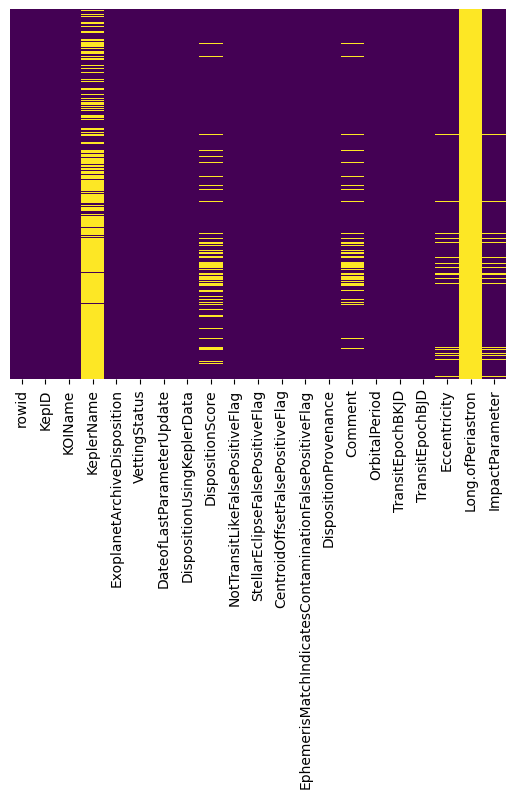

In [33]:
# see what we're missing
sns.heatmap(data.iloc[:, :21].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

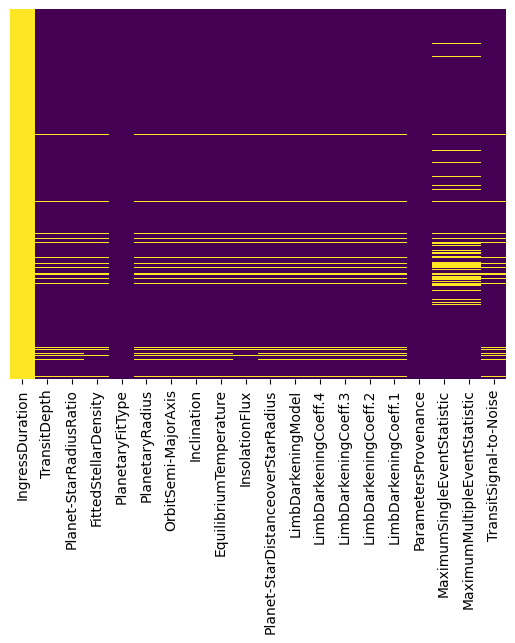

In [34]:
# see what we're missing
sns.heatmap(data.iloc[:, 22:42].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

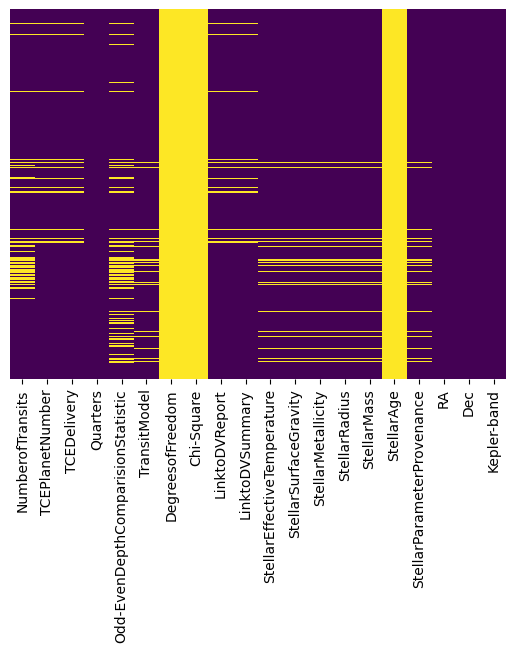

In [35]:
# see what we're missing
sns.heatmap(data.iloc[:, 43:63].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

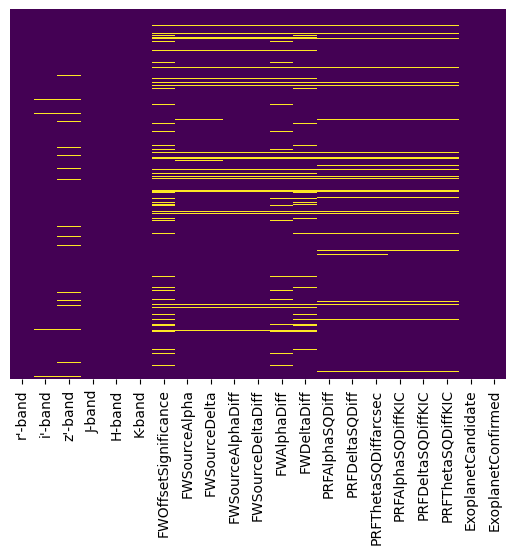

In [36]:
# see what we're missing
sns.heatmap(data.iloc[:, 64:].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
# Everything dropped is either something that's useless, all null/all 0, or bad for model
data.drop(columns = [
"rowid",
"KeplerName",
"KOIName",
"KepID",
"ExoplanetArchiveDisposition",
"VettingStatus",
"DateofLastParameterUpdate",
"DispositionUsingKeplerData",
"DispositionScore",
"NotTransitLikeFalsePositiveFlag",
"StellarEclipseFalsePositiveFlag",
"CentroidOffsetFalsePositiveFlag",
"EphemerisMatchIndicatesContaminationFalsePositiveFlag",
"DispositionProvenance",
"Comment",
"TransitEpochBKJD",
"TransitEpochBJD",
"Eccentricity",
"Long.ofPeriastron",
"IngressDuration",
"PlanetaryFitType",
"LimbDarkeningModel",
"LimbDarkeningCoeff.4",
"LimbDarkeningCoeff.3",
"ParametersProvenance",
"TCEDelivery",
"TransitModel",
"DegreesofFreedom",
"Chi-Square",
"LinktoDVReport",
"LinktoDVSummary",
"StellarAge",
"StellarParameterProvenance",
"RA", 
"Dec", 
], inplace = True)
# dropping RA and Dec since loc of planet in sky is irrelevant

In [38]:
data.head()

,OrbitalPeriod,ImpactParameter,TransitDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,Quarters,Odd-EvenDepthComparisionStatistic,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed
0,9.488036,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,0.2291,0.4603,5.135849,28.470820,35.8,2,142.0,1.0,17,0.6864,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2
1,54.418383,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,0.2291,0.4603,7.027669,20.109507,25.8,2,25.0,2.0,17,0.0023,5455.0,4.467,0.14,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2
2,19.899140,0.969,1.78220,10829.0,0.154046,7.29555,14.60,0.1419,88.96,638.0,39.30,53.500,0.2711,0.3858,37.159767,187.449100,76.3,1,56.0,1.0,14,0.6624,5853.0,4.544,-0.18,0.868,0.961,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,1,1
3,1.736952,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,0.2865,0.3556,39.066550,541.895100,505.6,1,621.0,1.0,14,0.0000,5805.0,4.564,-0.52,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,0,0
4,2.525592,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,0.2844,0.3661,4.749945,33.191900,40.9,1,515.0,1.0,16,0.3090,6031.0,4.438,0.07,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952,0.733,19.250326,48.22626,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070,1,2


# Exploratory Data Analysis

In [39]:
data.shape

(9564, 50)

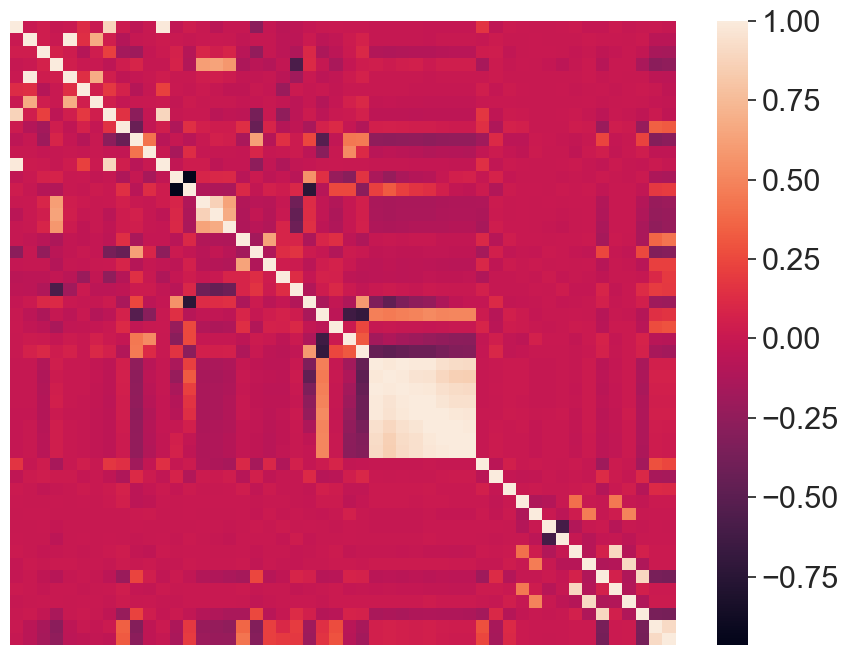

In [40]:
sns.set(font_scale = 2)
svm = sns.heatmap(data.corr(), xticklabels = False, yticklabels = False)
figure = svm.get_figure()
figure.subplots_adjust(left=-.3, bottom=-.3, right=1, top=1, wspace=10, hspace=10)
sns.set(font_scale = 1)

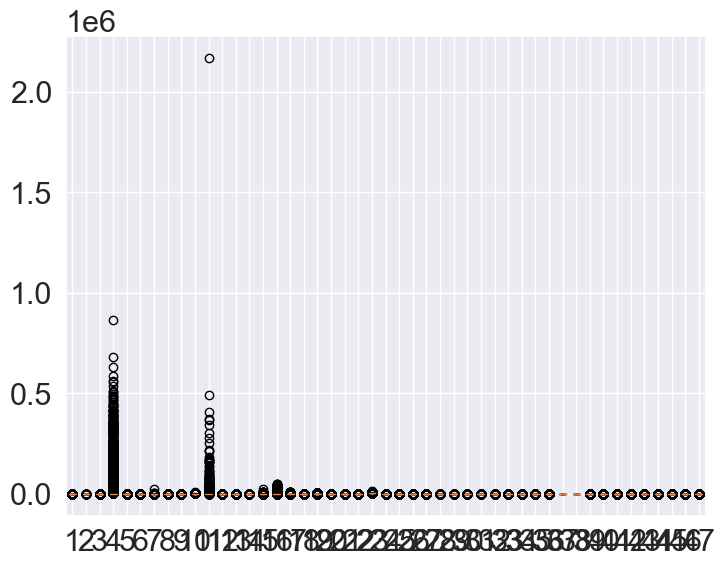

In [64]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_no_null.iloc[:, :47])
plt.show()

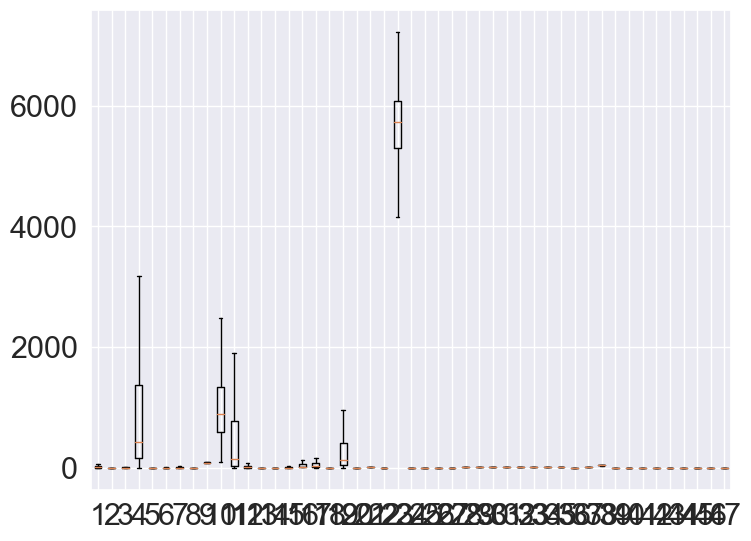

In [65]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_no_null.iloc[:, :47], showfliers = False)
plt.show()

# Testing Models

### Basic Models

In [66]:
# removes all rows with a null value
data_no_null = data.dropna()
data_no_null.shape

(6682, 50)

Proportion of testing size: 0.4
Naive Bayes:
Evaluation Metrics:
Accuracy: 0.8208005985783764
Recall: 0.9706078824315297
F1 Score: 0.858493353028065
Precision: 0.7695974576271186
Confusion Matrix:


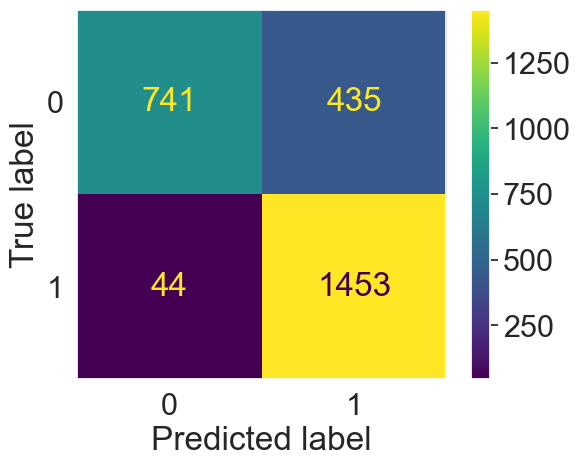



Logistic Regression:
Evaluation Metrics:
Accuracy: 0.9113355780022446
Recall: 0.9458917835671342
F1 Score: 0.9227761485826002
Precision: 0.9007633587786259
Confusion Matrix:


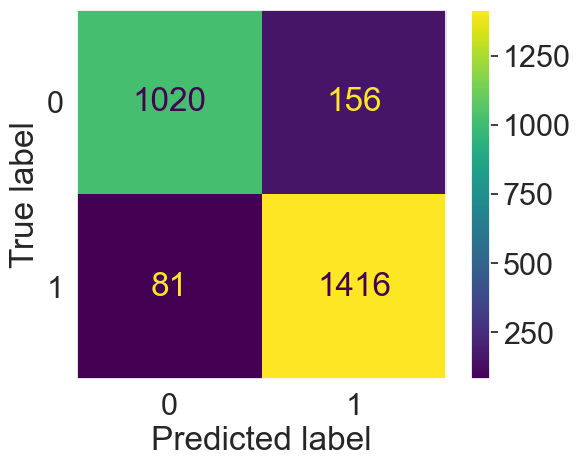



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.8013468013468014
Recall: 0.8911155644622578
F1 Score: 0.8340106283213504
Precision: 0.7837837837837838
Confusion Matrix:


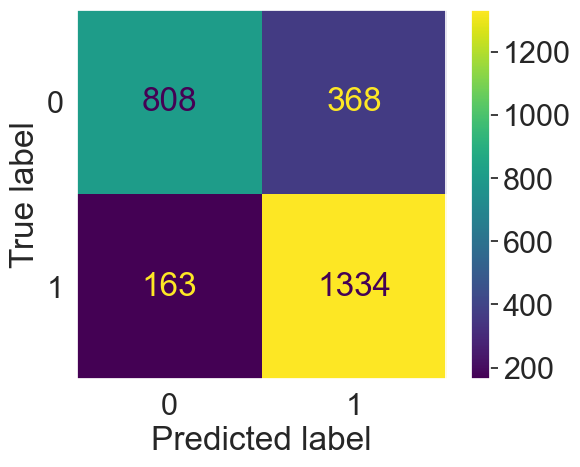



Random forest:
Evaluation Metrics:
Accuracy: 0.9330340441451552
Recall: 0.9452237808951236
F1 Score: 0.9405117979395147
Precision: 0.9358465608465608
Confusion Matrix:


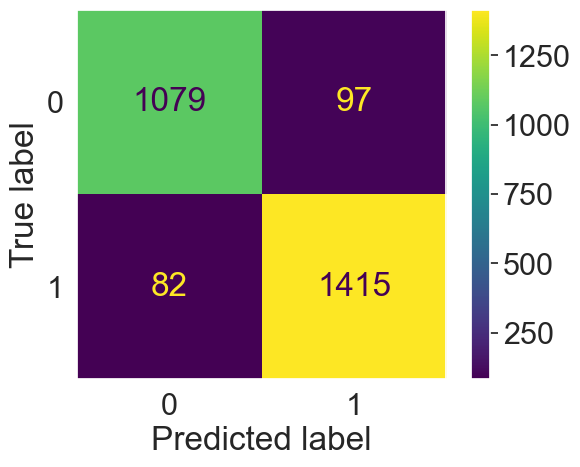



Boosting Tree:
Evaluation Metrics:
Accuracy: 0.9221848110737
Recall: 0.9385437541750167
F1 Score: 0.9310801855533466
Precision: 0.9237343852728468
Confusion Matrix:


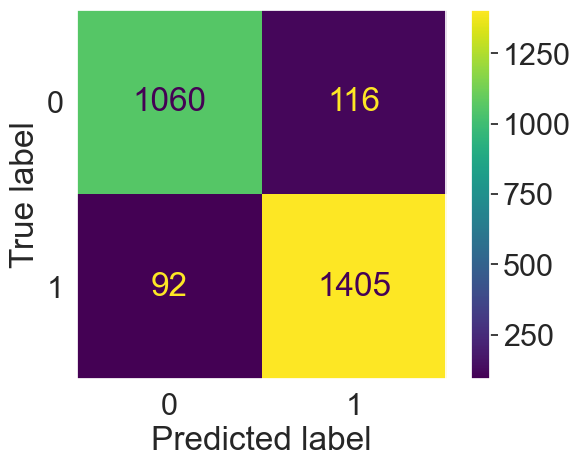



Voting Classification:
Evaluation Metrics:
Accuracy: 0.918443696221474
Recall: 0.9639278557114228
F1 Score: 0.9297680412371133
Precision: 0.8979464841319228
Confusion Matrix:


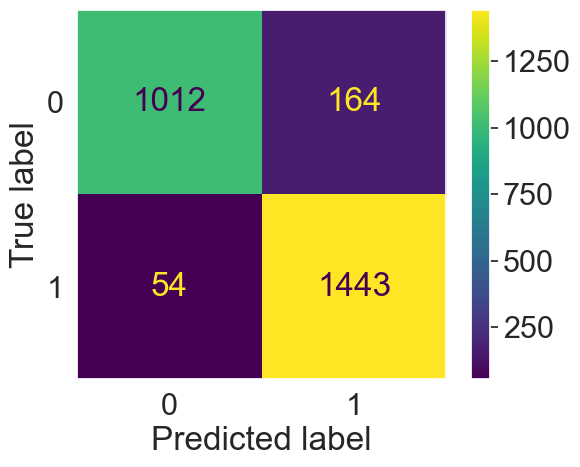



ROC Curve:


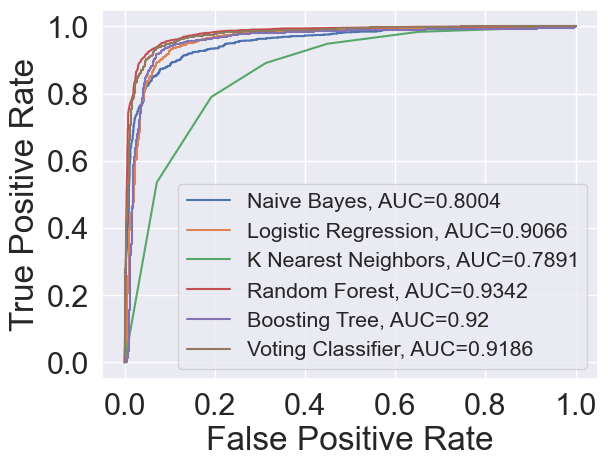

In [148]:
features = get_features(data_no_null)
targets = get_targets(data_no_null)

# test_models prints out data for our 4 models
test_models(features, targets, 0.4)

## Data Normalization

In [76]:
data_normal = data.copy()
for column in data_normal.columns[:48]:
    data_normal[column] = (data_normal[column] - data_normal[column].mean())/data_normal[column].std(ddof=0)
    
data_normal.head()

,OrbitalPeriod,ImpactParameter,TransitDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,Quarters,Odd-EvenDepthComparisionStatistic,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed
0,-0.049588,-0.175923,-0.411686,-0.281810,-0.079030,-0.110704,-0.032699,-0.244891,0.472374,-0.341451,-0.048067,-0.061435,-0.391021,0.496687,-0.222752,-0.240064,-0.281610,0.679862,-0.445293,-0.366652,0.603025,0.552958,-0.316037,0.362574,0.937383,-0.130852,-0.299650,0.781300,0.705483,0.757737,0.803759,0.824425,0.842741,0.892078,0.871050,-0.589763,-0.028395,1.198179,0.036840,0.053854,-0.001773,0.001767,0.000948,0.095367,-0.557644,0.043760,0.151451,-0.499819,1,2
1,-0.015924,-0.044527,-0.172241,-0.278660,-0.077333,-0.114129,-0.032514,0.087248,0.466462,-0.750184,-0.048598,0.001377,-0.391021,0.496687,-0.220298,-0.242076,-0.294177,0.679862,-0.659687,1.138156,0.603025,-0.813159,-0.316037,0.362574,0.937383,-0.130852,-0.299650,0.781300,0.705483,0.757737,0.803759,0.824425,0.842741,0.892078,0.871050,-0.585805,-0.028486,1.198201,-0.015497,0.067977,0.012998,-0.003610,0.167170,0.017650,-0.494069,0.215873,0.077047,-0.439542,1,2
2,-0.041787,0.069847,-0.593305,-0.157619,-0.039197,-0.034734,-0.028690,-0.144949,0.426390,-0.522461,-0.048408,-0.027491,0.257103,-0.205681,-0.181209,-0.201791,-0.230716,-0.465295,-0.602881,-0.366652,0.081378,0.505031,0.183451,0.540575,-0.196986,-0.140482,-0.179454,0.845542,0.740774,0.844465,0.885771,0.954477,0.975884,1.009665,1.011416,0.502731,1.030784,1.196015,0.014572,0.006225,0.013685,0.014135,-0.005285,0.004438,-0.610512,0.011017,0.019482,-0.597937,1,1
3,-0.055395,0.161526,-0.496846,-0.191056,0.031378,-0.166223,-0.022561,-0.348364,-1.010271,0.361570,-0.043052,-0.086909,0.494748,-0.490399,-0.178736,-0.116462,0.308766,-0.465295,0.432441,-0.366652,0.081378,-0.817752,0.123211,0.586809,-1.402252,-0.153049,-0.537182,0.961756,0.845315,0.962993,1.011109,1.035759,1.031618,1.018346,0.998010,-0.597680,-1.365288,1.237992,0.010128,0.008173,0.053534,-0.007590,-0.098370,0.074772,-0.527864,-0.097708,0.068824,-0.514554,0,0
4,-0.054804,-0.010185,-0.613039,-0.281962,-0.078510,-0.133409,-0.032540,-0.329471,0.193187,0.374416,-0.042838,-0.080435,0.462342,-0.391408,-0.223253,-0.238927,-0.275201,-0.465295,0.238203,-0.366652,0.429143,-0.200693,0.406841,0.295535,0.689240,-0.111429,0.204030,0.898236,0.788717,0.900838,0.941477,1.015438,1.062581,1.139089,1.110776,2.303763,-0.692580,1.221614,0.015115,0.019277,0.003036,0.006929,0.017570,-0.017323,-0.591105,0.039562,0.037887,-0.583538,1,2


In [77]:
data_normal_no_null = data_normal.dropna()

### Box Plot

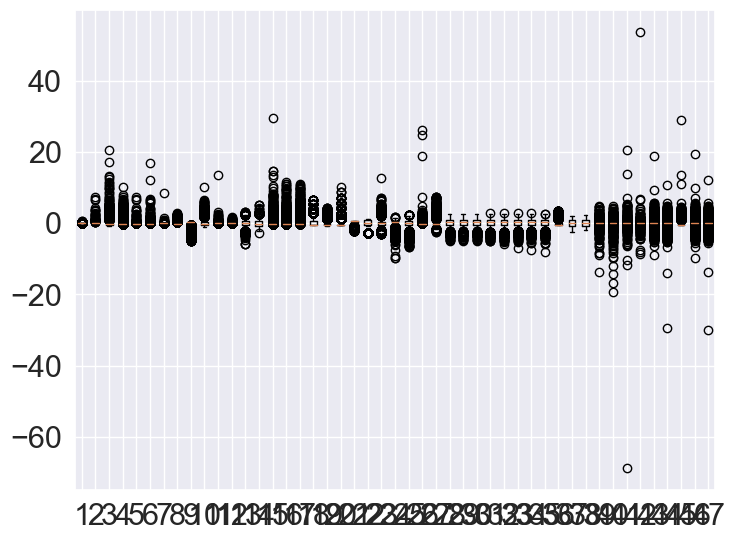

In [78]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_normal_no_null.iloc[:, :47], showfliers = True)
plt.show()

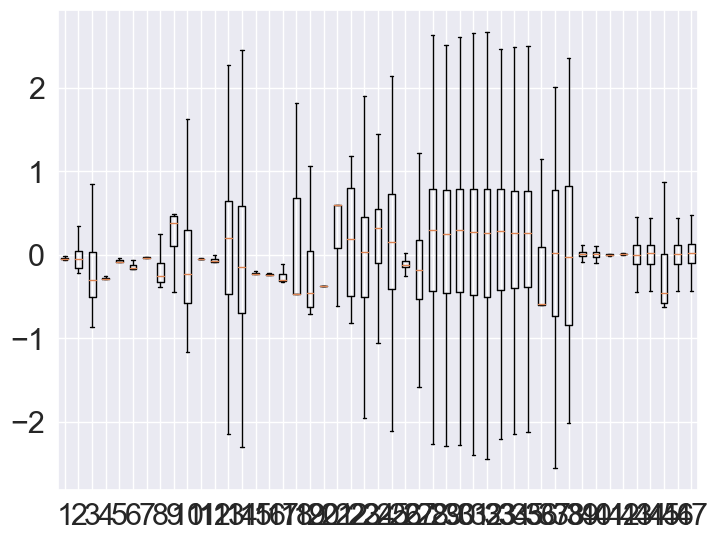

In [79]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_normal_no_null.iloc[:, :47], showfliers = False)
plt.show()

Proportion of testing size: 0.4
Naive Bayes:
Evaluation Metrics:
Accuracy: 0.8705574261129817
Recall: 0.9645958583834335
F1 Score: 0.8930117501546073
Precision: 0.8313183649971215
Confusion Matrix:


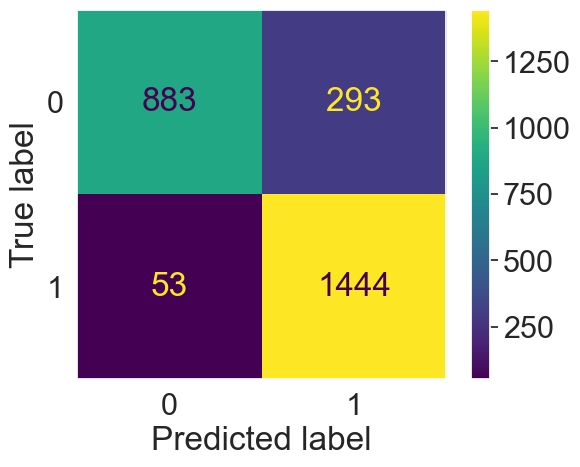



Logistic Regression:
Evaluation Metrics:
Accuracy: 0.9244294799850356
Recall: 0.9458917835671342
F1 Score: 0.9334212261041529
Precision: 0.9212752114508783
Confusion Matrix:


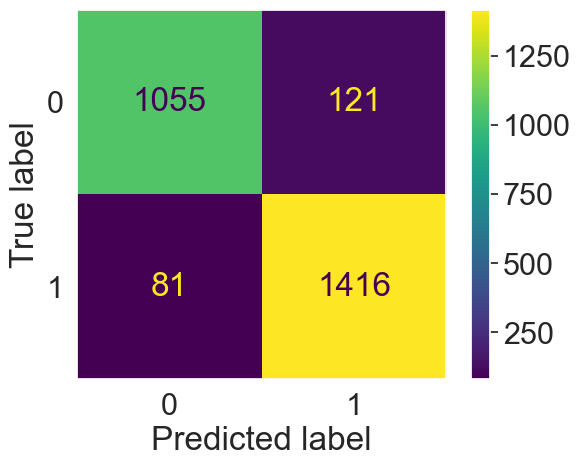



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.8698092031425365
Recall: 0.9792919171676687
F1 Score: 0.8939024390243904
Precision: 0.8222097588334268
Confusion Matrix:


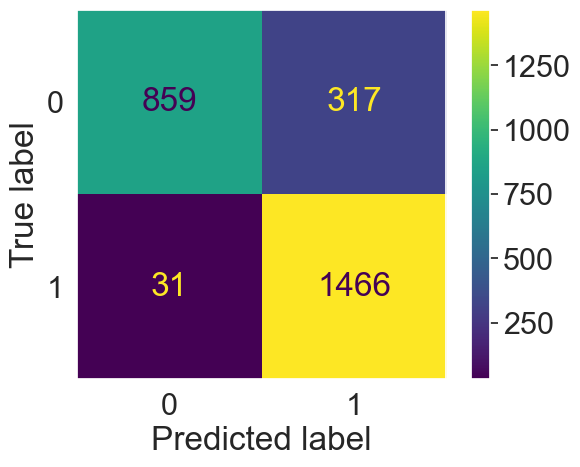



Random forest:
Evaluation Metrics:
Accuracy: 0.9307893752338197
Recall: 0.9445557782231129
F1 Score: 0.938599402588782
Precision: 0.9327176781002638
Confusion Matrix:


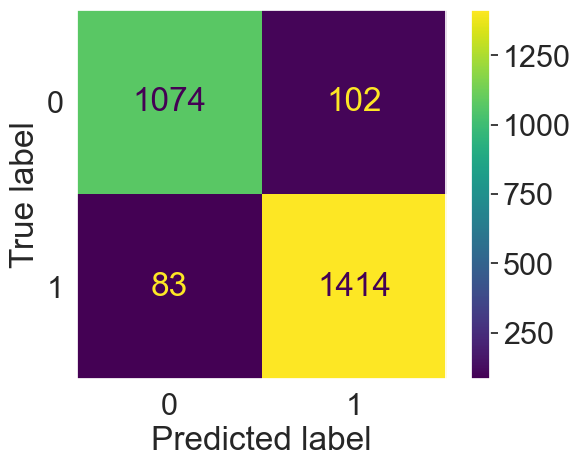



Boosting Tree:
Evaluation Metrics:
Accuracy: 0.9255518144407033
Recall: 0.9478957915831663
F1 Score: 0.9344748106684228
Precision: 0.9214285714285714
Confusion Matrix:


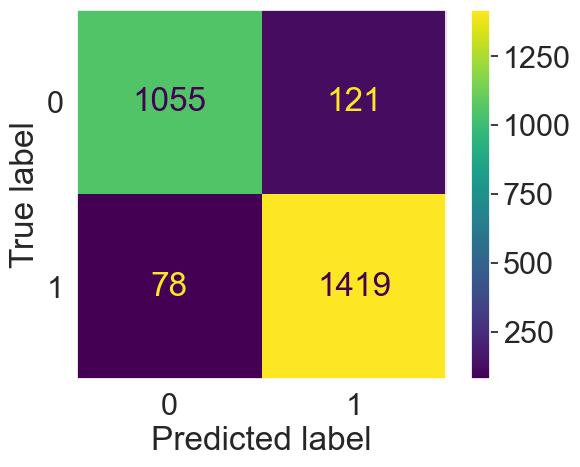



Voting Classification:
Evaluation Metrics:
Accuracy: 0.9326599326599326
Recall: 0.9679358717434869
F1 Score: 0.9415204678362573
Precision: 0.9165085388994307
Confusion Matrix:


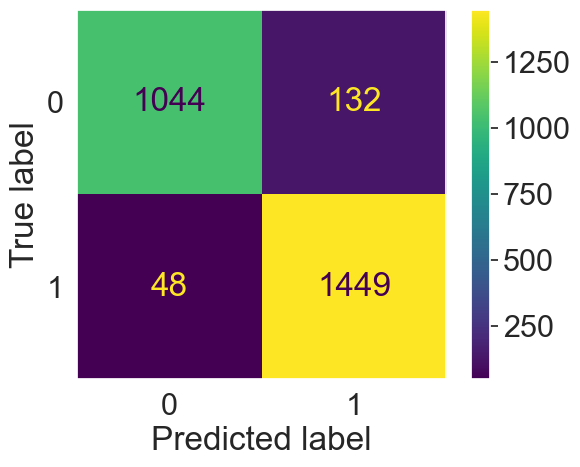



ROC Curve:


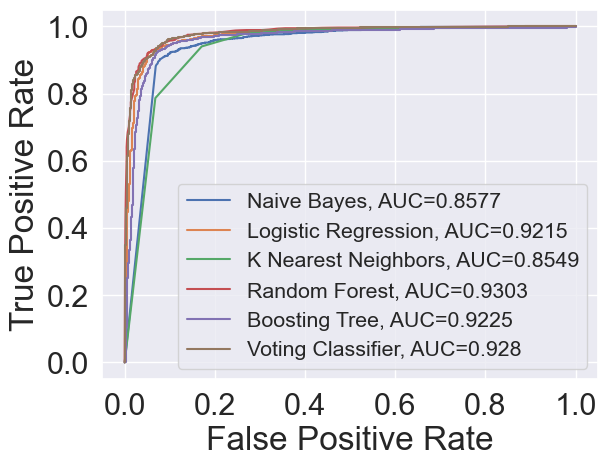

In [80]:
features_normal = get_features(data_normal_no_null)
targets_normal = get_targets(data_normal_no_null)

test_models(features_normal, targets_normal, 0.4)

### absurd z-scores

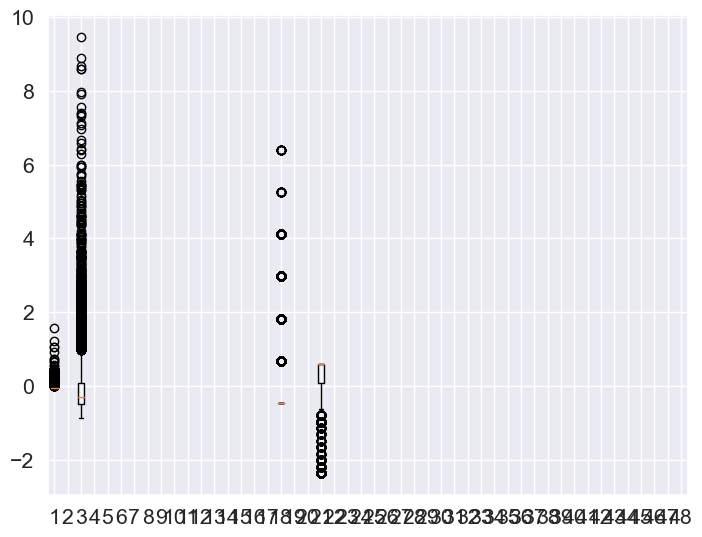

In [140]:
# removes items with z score > +- 5
data_absurd_z = data_normal.copy()
col_names = list(data_absurd_z)

for col in col_names:
    temp = data_absurd_z[(abs(data_absurd_z[col] != data_absurd_z[col])) | (data_absurd_z[col] <= 10)]
    data_absurd_z = temp.copy()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_absurd_z.iloc[:, :48], showfliers = True)
plt.show()

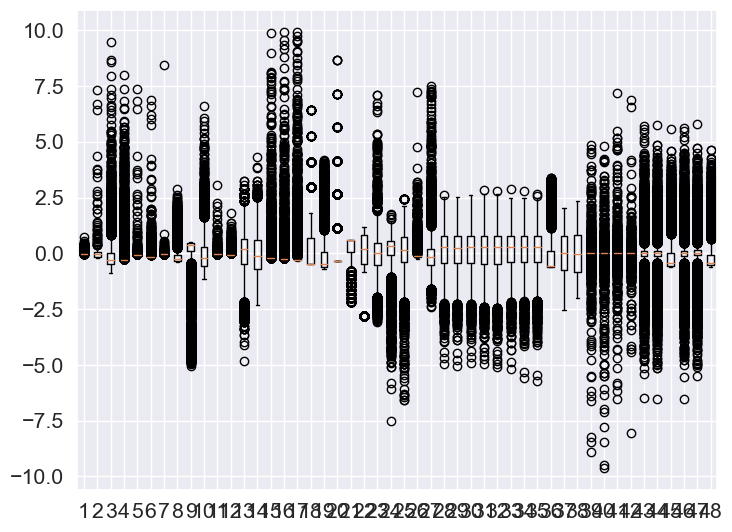

In [151]:
# removes items with z score > +- 5
data_absurd_z_null = data_normal_no_null.copy()
col_names = list(data_absurd_z_null)

for col in col_names:
    temp = data_absurd_z_null[abs(data_absurd_z_null[col]) <= 10]
    data_absurd_z_null = temp.copy()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_absurd_z_null.iloc[:, :48], showfliers = True)
plt.show()

In [136]:
data_absurd_z.shape

(6648, 50)

In [129]:
data_absurd_z.head()

,OrbitalPeriod,ImpactParameter,TransitDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,Quarters,Odd-EvenDepthComparisionStatistic,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed
0,-0.049588,-0.175923,-0.411686,-0.281810,-0.079030,-0.110704,-0.032699,-0.244891,0.472374,-0.341451,-0.048067,-0.061435,-0.391021,0.496687,-0.222752,-0.240064,-0.281610,0.679862,-0.445293,-0.366652,0.603025,0.552958,-0.316037,0.362574,0.937383,-0.130852,-0.299650,0.781300,0.705483,0.757737,0.803759,0.824425,0.842741,0.892078,0.871050,-0.589763,-0.028395,1.198179,0.036840,0.053854,-0.001773,0.001767,0.000948,0.095367,-0.557644,0.043760,0.151451,-0.499819,1,2
1,-0.015924,-0.044527,-0.172241,-0.278660,-0.077333,-0.114129,-0.032514,0.087248,0.466462,-0.750184,-0.048598,0.001377,-0.391021,0.496687,-0.220298,-0.242076,-0.294177,0.679862,-0.659687,1.138156,0.603025,-0.813159,-0.316037,0.362574,0.937383,-0.130852,-0.299650,0.781300,0.705483,0.757737,0.803759,0.824425,0.842741,0.892078,0.871050,-0.585805,-0.028486,1.198201,-0.015497,0.067977,0.012998,-0.003610,0.167170,0.017650,-0.494069,0.215873,0.077047,-0.439542,1,2
2,-0.041787,0.069847,-0.593305,-0.157619,-0.039197,-0.034734,-0.028690,-0.144949,0.426390,-0.522461,-0.048408,-0.027491,0.257103,-0.205681,-0.181209,-0.201791,-0.230716,-0.465295,-0.602881,-0.366652,0.081378,0.505031,0.183451,0.540575,-0.196986,-0.140482,-0.179454,0.845542,0.740774,0.844465,0.885771,0.954477,0.975884,1.009665,1.011416,0.502731,1.030784,1.196015,0.014572,0.006225,0.013685,0.014135,-0.005285,0.004438,-0.610512,0.011017,0.019482,-0.597937,1,1
3,-0.055395,0.161526,-0.496846,-0.191056,0.031378,-0.166223,-0.022561,-0.348364,-1.010271,0.361570,-0.043052,-0.086909,0.494748,-0.490399,-0.178736,-0.116462,0.308766,-0.465295,0.432441,-0.366652,0.081378,-0.817752,0.123211,0.586809,-1.402252,-0.153049,-0.537182,0.961756,0.845315,0.962993,1.011109,1.035759,1.031618,1.018346,0.998010,-0.597680,-1.365288,1.237992,0.010128,0.008173,0.053534,-0.007590,-0.098370,0.074772,-0.527864,-0.097708,0.068824,-0.514554,0,0
4,-0.054804,-0.010185,-0.613039,-0.281962,-0.078510,-0.133409,-0.032540,-0.329471,0.193187,0.374416,-0.042838,-0.080435,0.462342,-0.391408,-0.223253,-0.238927,-0.275201,-0.465295,0.238203,-0.366652,0.429143,-0.200693,0.406841,0.295535,0.689240,-0.111429,0.204030,0.898236,0.788717,0.900838,0.941477,1.015438,1.062581,1.139089,1.110776,2.303763,-0.692580,1.221614,0.015115,0.019277,0.003036,0.006929,0.017570,-0.017323,-0.591105,0.039562,0.037887,-0.583538,1,2


Proportion of testing size: 0.4
Naive Bayes:
Evaluation Metrics:
Accuracy: 0.8710526315789474
Recall: 0.9583061889250815
F1 Score: 0.8955859969558599
Precision: 0.8405714285714285
Confusion Matrix:


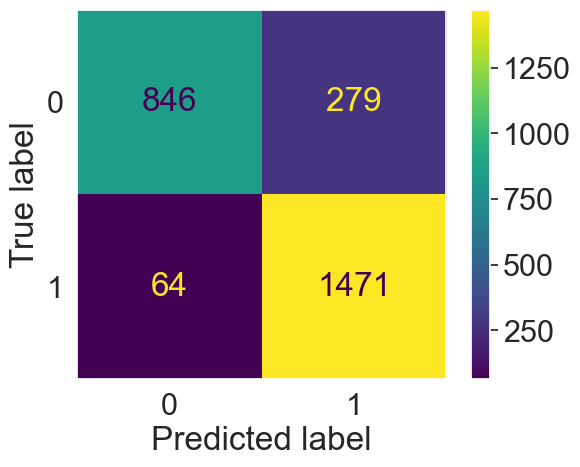



Logistic Regression:
Evaluation Metrics:
Accuracy: 0.9180451127819549
Recall: 0.9387622149837134
F1 Score: 0.9296774193548387
Precision: 0.9207667731629393
Confusion Matrix:


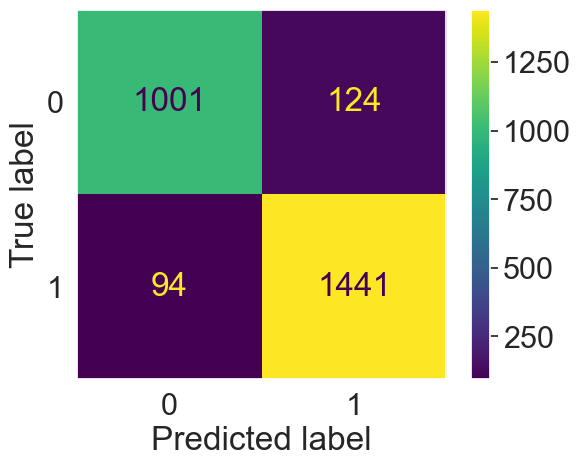



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.8710526315789474
Recall: 0.9706840390879479
F1 Score: 0.8967800180559735
Precision: 0.8333333333333334
Confusion Matrix:


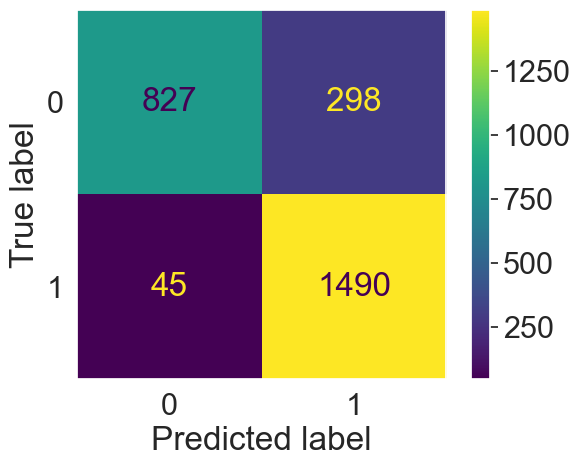



Random forest:
Evaluation Metrics:
Accuracy: 0.9270676691729324
Recall: 0.9328990228013029
F1 Score: 0.9365598430346631
Precision: 0.9402495075508864
Confusion Matrix:


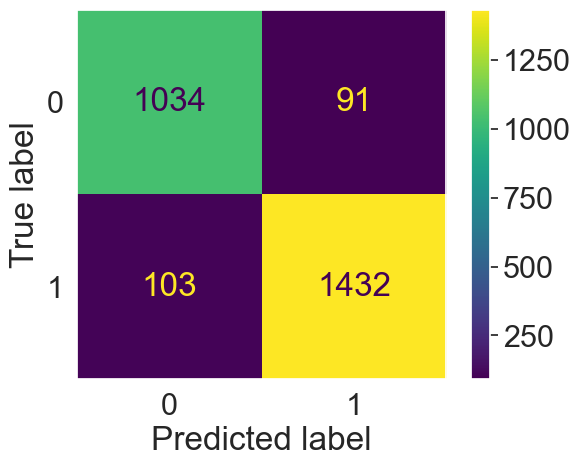



Boosting Tree:
Evaluation Metrics:
Accuracy: 0.9176691729323309
Recall: 0.9315960912052117
F1 Score: 0.9288730107177654
Precision: 0.9261658031088082
Confusion Matrix:


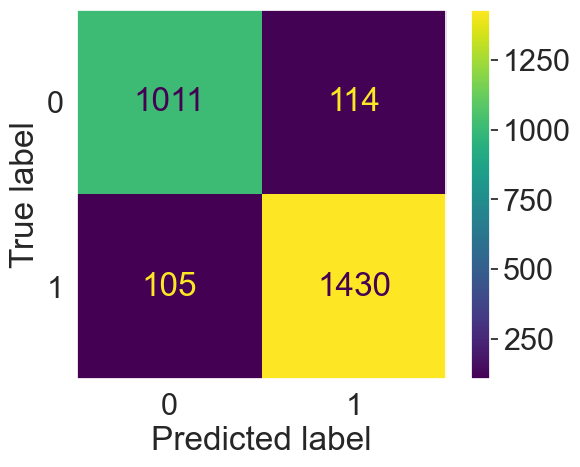



Voting Classification:
Evaluation Metrics:
Accuracy: 0.9263157894736842
Recall: 0.952442996742671
F1 Score: 0.9371794871794872
Precision: 0.922397476340694
Confusion Matrix:


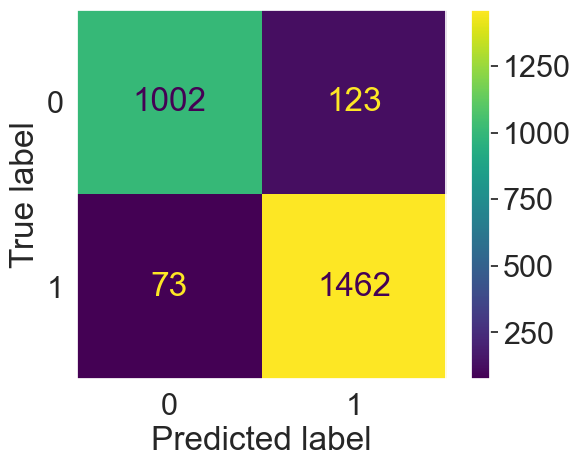



ROC Curve:


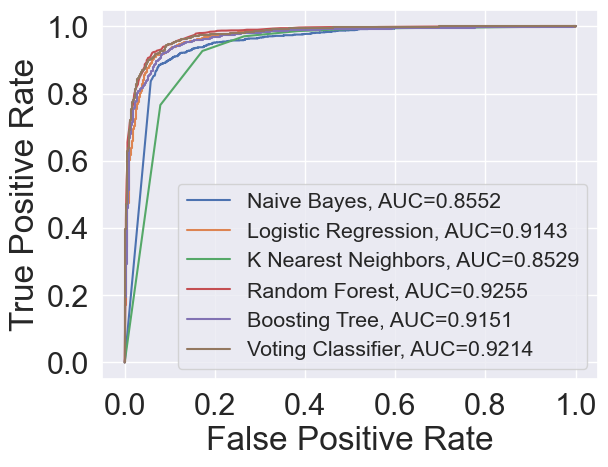

In [142]:
features = get_features(data_absurd_z_null)
targets = get_targets(data_absurd_z_null)

# test_models prints out data for our 4 models
test_models(features, targets, 0.4)

### Imputation

In [49]:
data_normal.shape

(9564, 50)

In [50]:
print(data_normal.isnull().values.sum())

20801


<AxesSubplot:>

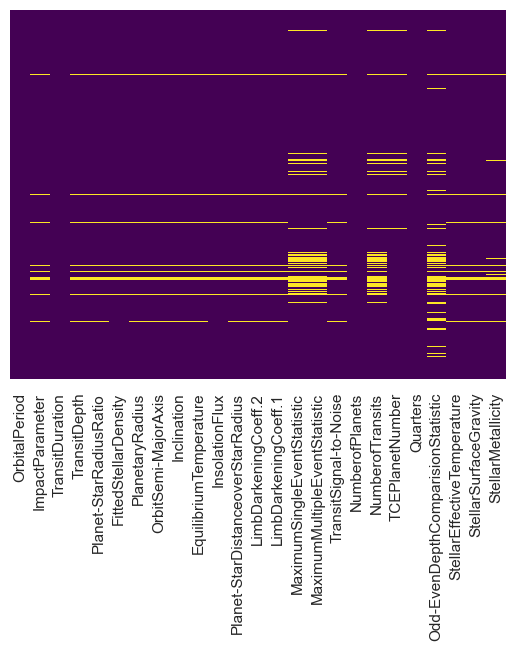

In [51]:
# check what stuff is missing again
sns.set(font_scale = 1)
sns.heatmap(data.iloc[:, :25].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

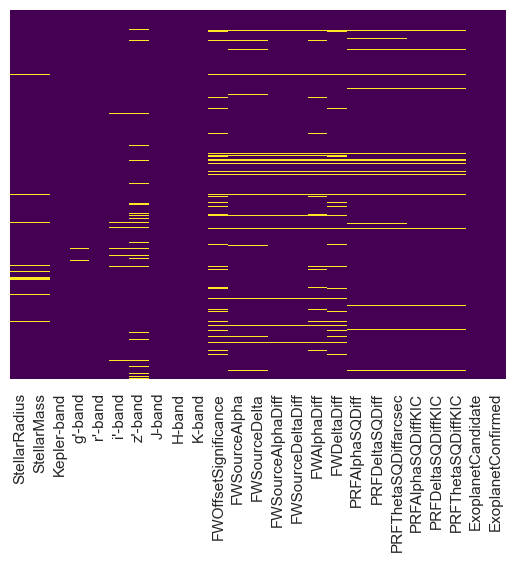

In [52]:
sns.heatmap(data.iloc[:, 25:].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

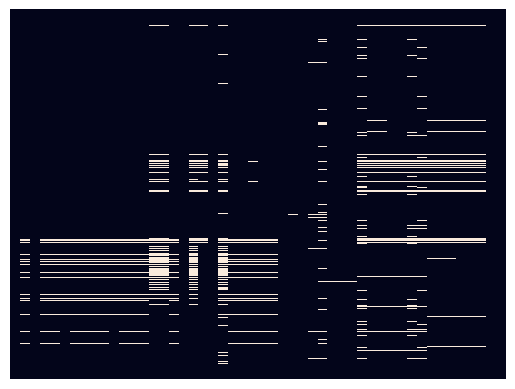

In [141]:
sns.heatmap(data_absurd_z.isnull(), xticklabels = False, yticklabels = False, cbar = False)

### Imputation function

In [56]:
def impute(imputer, data):
    imputer.fit(data)
    np_data_imp = imputer.transform(data)

    data_imp = pd.DataFrame(np_data_imp, columns = [
        "OrbitalPeriod",
        "ImpactParameter",
        "TransitDuration",
        "TransitDepth",
        "Planet-StarRadiusRatio",
        "FittedStellarDensity",
        "PlanetaryRadius",
        "OrbitSemi-MajorAxis",
        "Inclination",
        "EquilibriumTemperature",
        "InsolationFlux",
        "Planet-StarDistanceoverStarRadius",
        "LimbDarkeningCoeff.2",
        "LimbDarkeningCoeff.1",
        "MaximumSingleEventStatistic",
        "MaximumMultipleEventStatistic",
        "TransitSignal-to-Noise",
        "NumberofPlanets",
        "NumberofTransits",
        "TCEPlanetNumber",
        "Odd-EvenDepthComparisionStatistic",
        "StellarEffectiveTemperature",
        "StellarSurfaceGravity",
        "StellarMetallicity",
        "StellarRadius",
        "StellarMass",
        "Kepler-band",
        "Quarters",
        "g'-band",
        "r'-band",
        "i'-band",
        "z'-band",
        "J-band",
        "H-band",
        "K-band",
        "FWOffsetSignificance",
        "FWSourceAlpha",
        "FWSourceDelta",
        "FWSourceAlphaDiff",
        "FWSourceDeltaDiff",
        "FWAlphaDiff",
        "FWDeltaDiff",
        "PRFAlphaSQDiff",
        "PRFDeltaSQDiff",
        "PRFThetaSQDiffarcsec",
        "PRFAlphaSQDiffKIC",
        "PRFDeltaSQDiffKIC",
        "PRFThetaSQDiffKIC",
        "ExoplanetCandidate",
        "ExoplanetConfirmed"
    ])

    features_imp = get_features(data_imp)
    targets_imp = get_targets(data_imp)
    test_models(features_imp, targets_imp, 0.4)

### Mean Imputation

Proportion of testing size: 0.4
Naive Bayes:
Evaluation Metrics:
Accuracy: 0.8016967126193001
Recall: 0.9591397849462365
F1 Score: 0.8266913809082483
Precision: 0.7263843648208469
Confusion Matrix:


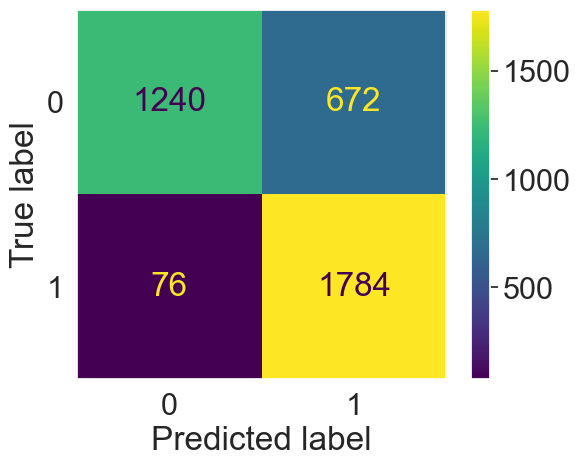



Logistic Regression:
Evaluation Metrics:
Accuracy: 0.866118769883351
Recall: 0.8903225806451613
F1 Score: 0.867697144354205
Precision: 0.8461931527848748
Confusion Matrix:


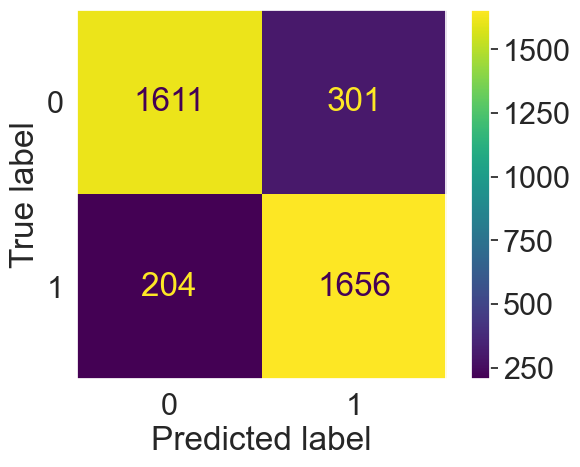



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.8266171792152704
Recall: 0.8973118279569893
F1 Score: 0.8361723446893787
Precision: 0.7828330206378987
Confusion Matrix:


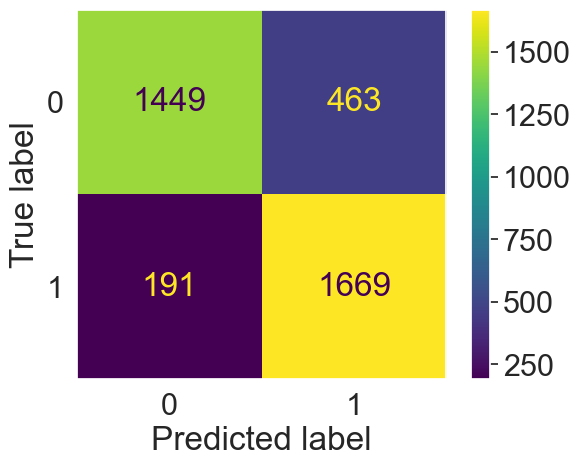



Random forest:
Evaluation Metrics:
Accuracy: 0.8947507953340403
Recall: 0.8876344086021506
F1 Score: 0.8926736955934036
Precision: 0.8977705274605764
Confusion Matrix:


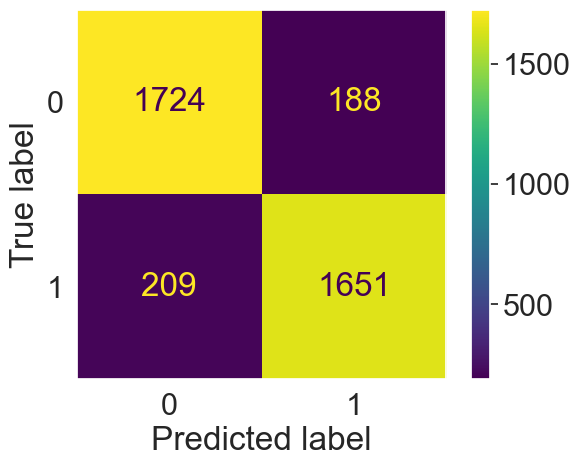



Boosting Tree:
Evaluation Metrics:
Accuracy: 0.8804347826086957
Recall: 0.8865591397849463
F1 Score: 0.8797012536676448
Precision: 0.8729486500794071
Confusion Matrix:


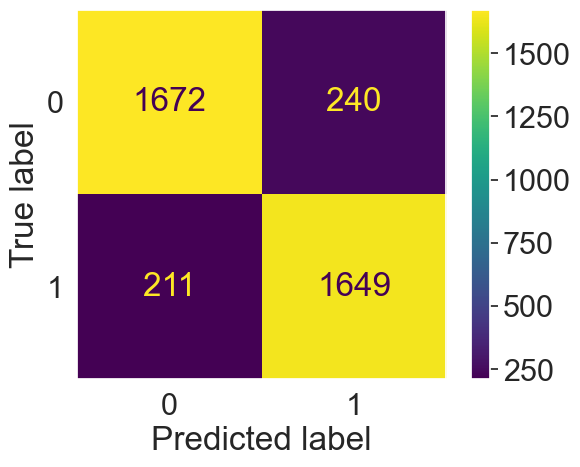



Voting Classification:
Evaluation Metrics:
Accuracy: 0.8828207847295865
Recall: 0.9311827956989247
F1 Score: 0.8868407578084997
Precision: 0.8465298142717498
Confusion Matrix:


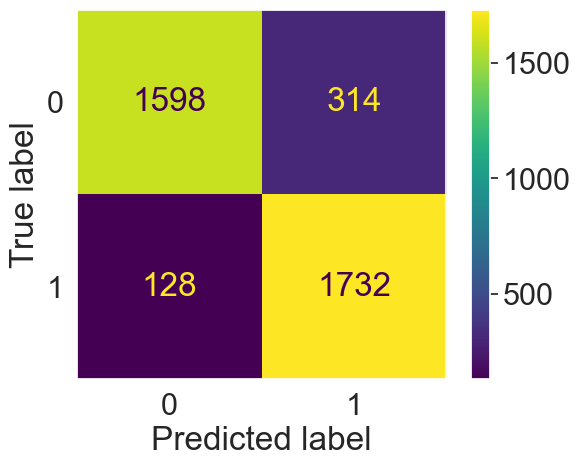



ROC Curve:


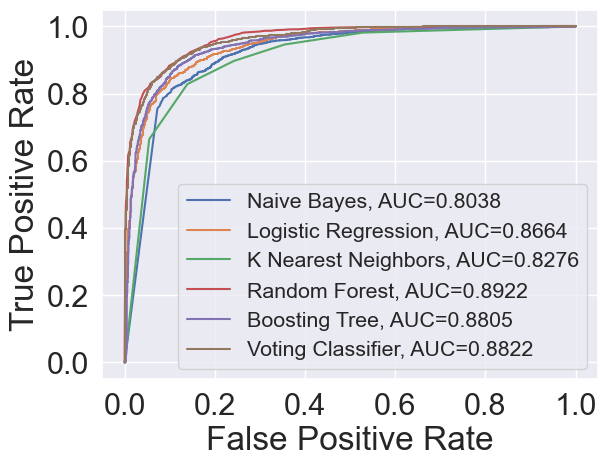

In [143]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute(imp_mean, data_absurd_z)

### Median Impuatation

Proportion of testing size: 0.4
Naive Bayes:
Evaluation Metrics:
Accuracy: 0.8001060445387063
Recall: 0.9586021505376344
F1 Score: 0.825462962962963
Precision: 0.7247967479674797
Confusion Matrix:


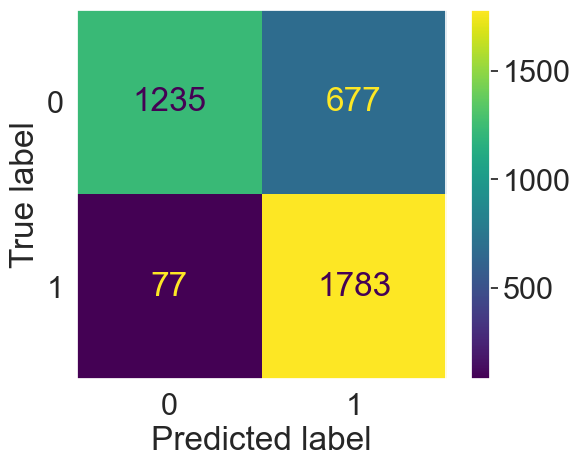



Logistic Regression:
Evaluation Metrics:
Accuracy: 0.8579003181336161
Recall: 0.8817204301075269
F1 Score: 0.8595387840670861
Precision: 0.8384458077709611
Confusion Matrix:


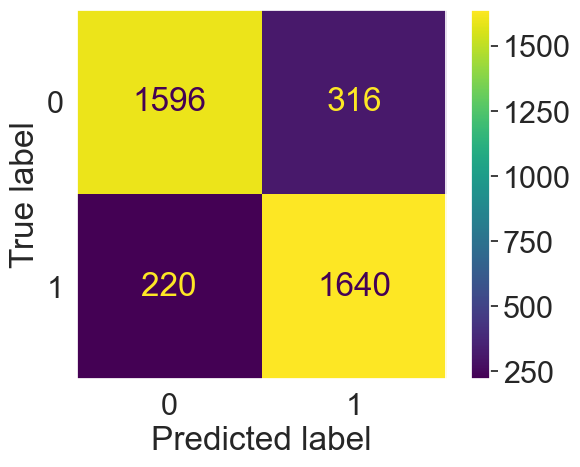



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.8255567338282078
Recall: 0.8935483870967742
F1 Score: 0.8347564038171773
Precision: 0.7832233741753063
Confusion Matrix:


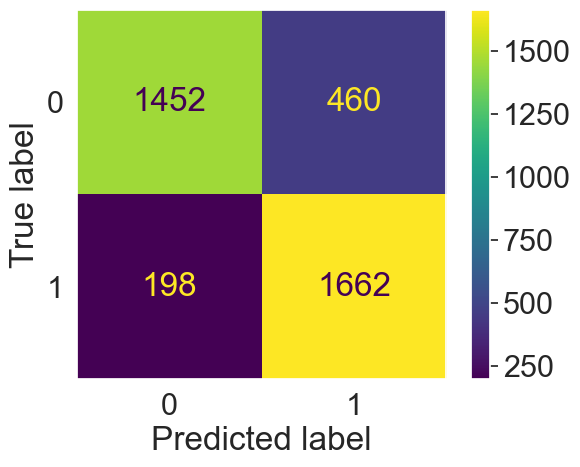



Random forest:
Evaluation Metrics:
Accuracy: 0.8923647932131495
Recall: 0.8838709677419355
F1 Score: 0.8900920411478073
Precision: 0.8964013086150491
Confusion Matrix:


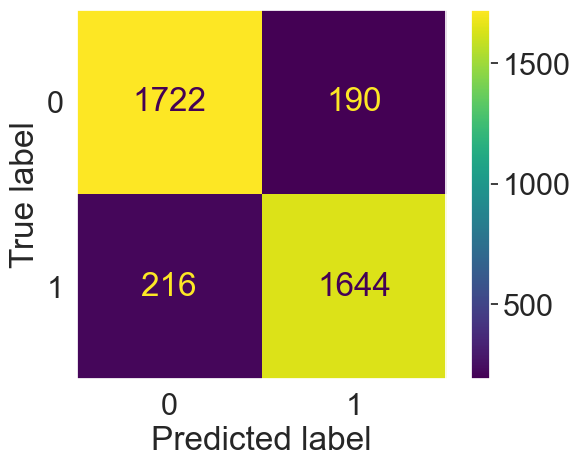



Boosting Tree:
Evaluation Metrics:
Accuracy: 0.8796394485683987
Recall: 0.885483870967742
F1 Score: 0.8788687299893277
Precision: 0.8723516949152542
Confusion Matrix:


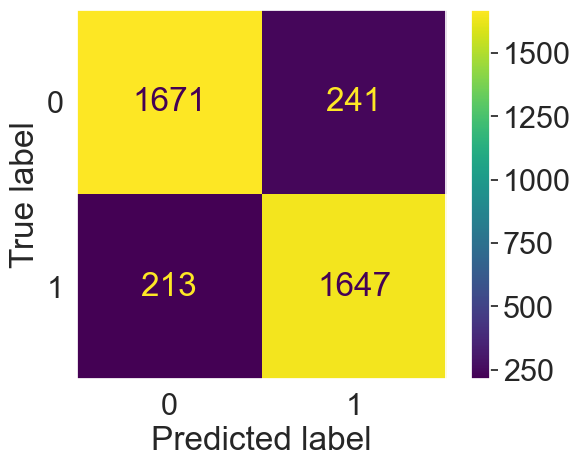



Voting Classification:
Evaluation Metrics:
Accuracy: 0.8791092258748674
Recall: 0.9360215053763441
F1 Score: 0.8842051802945657
Precision: 0.8378248315688162
Confusion Matrix:


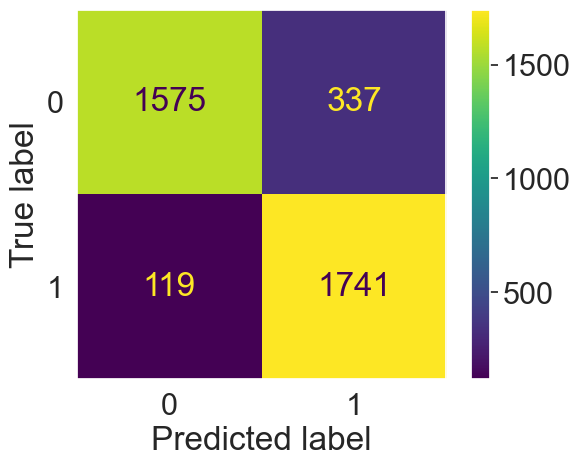



ROC Curve:


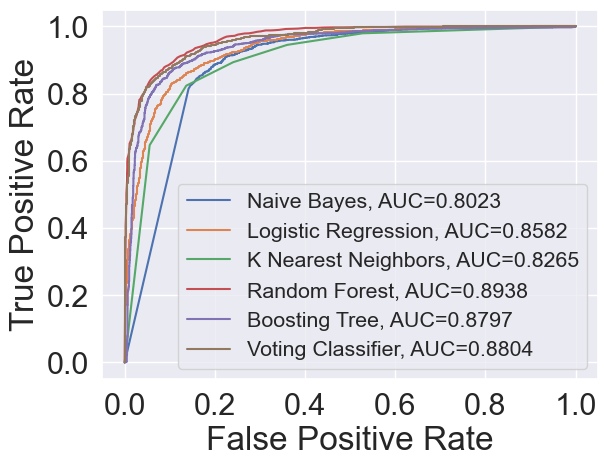

In [144]:
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')

impute(imp_median, data_absurd_z)

### Iterative Imputation

Proportion of testing size: 0.4
Naive Bayes:
Evaluation Metrics:
Accuracy: 0.8075291622481442
Recall: 0.9553763440860215
F1 Score: 0.8303738317757009
Precision: 0.734297520661157
Confusion Matrix:


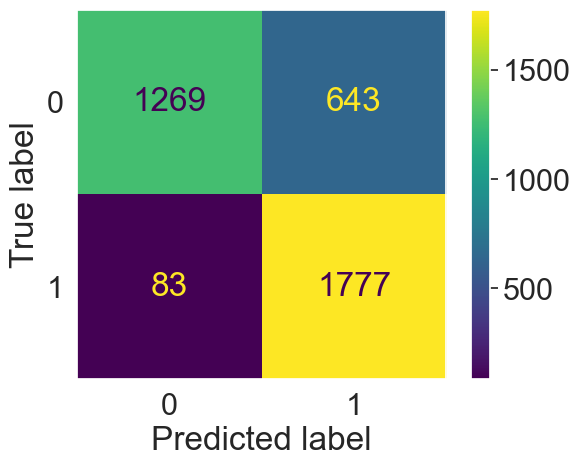



Logistic Regression:
Evaluation Metrics:
Accuracy: 0.8902439024390244
Recall: 0.9123655913978495
F1 Score: 0.8912815126050421
Precision: 0.8711498973305954
Confusion Matrix:


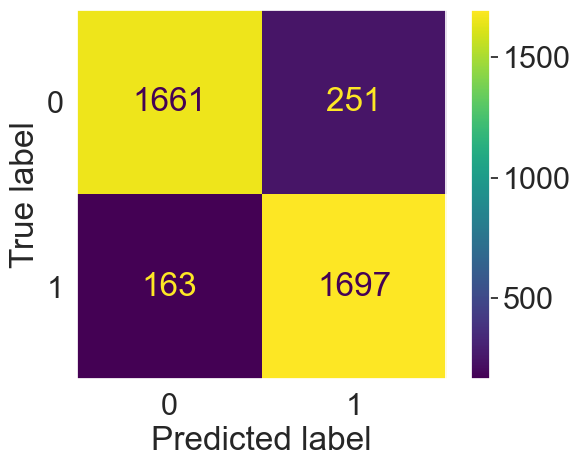



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.8478260869565217
Recall: 0.9241935483870968
F1 Score: 0.8569292123629114
Precision: 0.7987918215613383
Confusion Matrix:


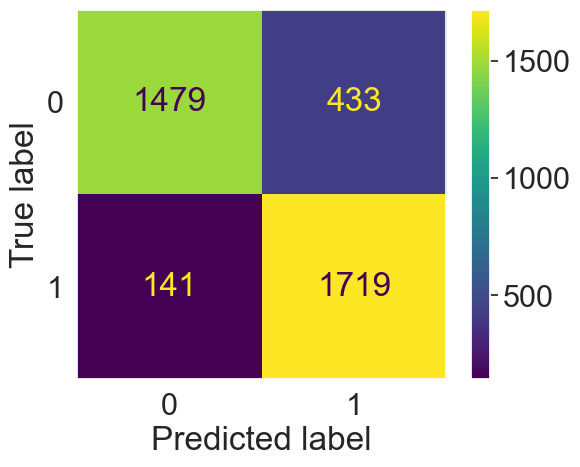



Random forest:
Evaluation Metrics:
Accuracy: 0.9093319194061505
Recall: 0.910752688172043
F1 Score: 0.9083109919571046
Precision: 0.9058823529411765
Confusion Matrix:


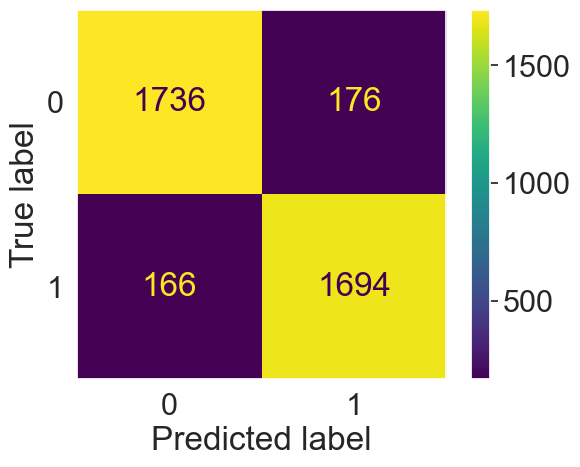



Boosting Tree:
Evaluation Metrics:
Accuracy: 0.9069459172852599
Recall: 0.9134408602150538
F1 Score: 0.9063750333422246
Precision: 0.8994176813128639
Confusion Matrix:


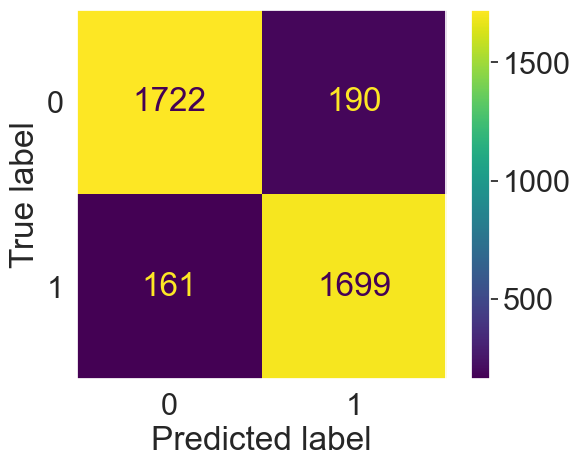



Voting Classification:
Evaluation Metrics:
Accuracy: 0.9042948038176034
Recall: 0.9446236559139785
F1 Score: 0.9068387096774193
Precision: 0.8719602977667493
Confusion Matrix:


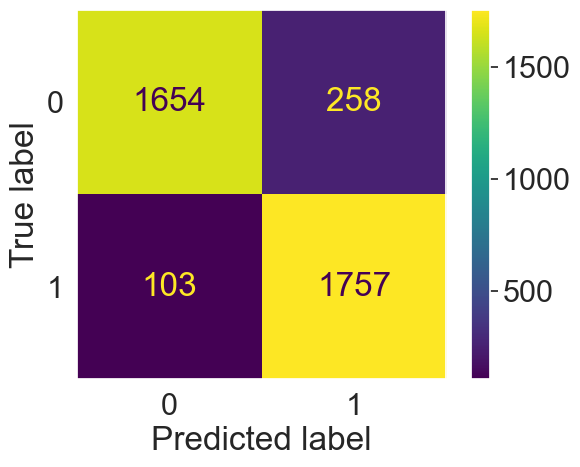



ROC Curve:


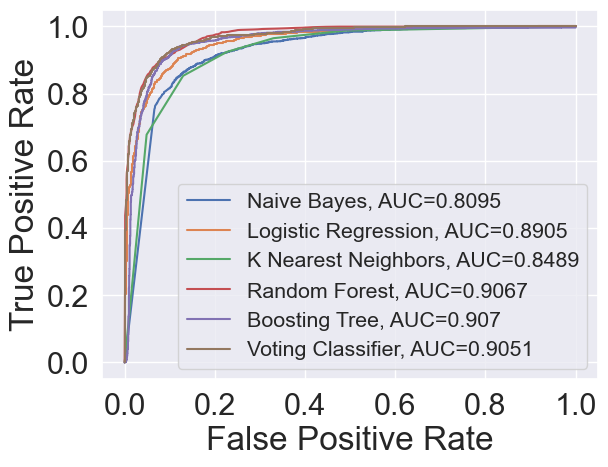

In [145]:
imp_iter = IterativeImputer(max_iter = 100, random_state = 42)

impute(imp_iter, data_absurd_z)

### K Nearest Neighbors Imputation

Proportion of testing size: 0.4
Naive Bayes:
Evaluation Metrics:
Accuracy: 0.8101802757158006
Recall: 0.9553763440860215
F1 Score: 0.8323185011709602
Precision: 0.737344398340249
Confusion Matrix:


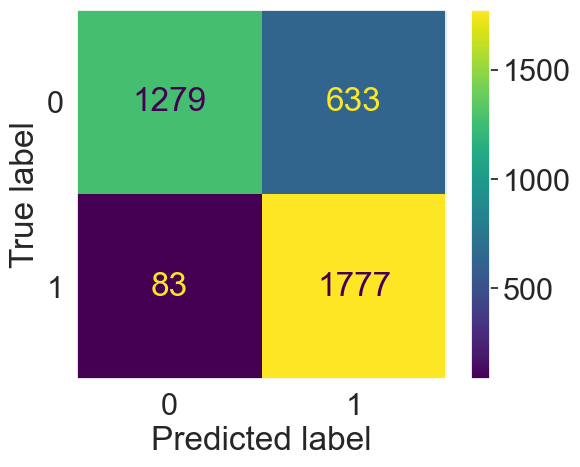



Logistic Regression:
Evaluation Metrics:
Accuracy: 0.8738069989395546
Recall: 0.9037634408602151
F1 Score: 0.8759770713913496
Precision: 0.8498483316481295
Confusion Matrix:


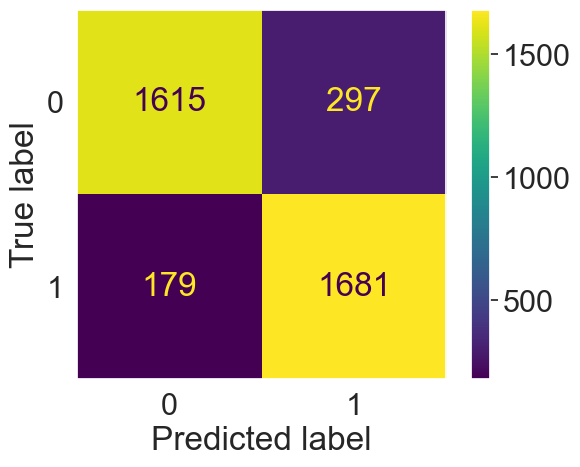



K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.8443796394485684
Recall: 0.9268817204301075
F1 Score: 0.8545229244114002
Precision: 0.7926436781609195
Confusion Matrix:


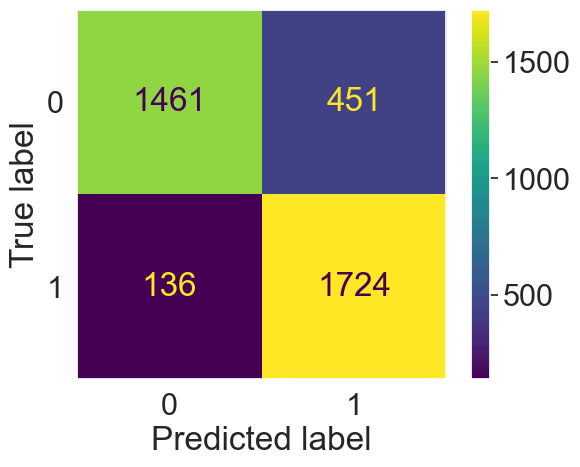



Random forest:
Evaluation Metrics:
Accuracy: 0.8997879109225875
Recall: 0.8946236559139785
F1 Score: 0.8980032379924446
Precision: 0.9014084507042254
Confusion Matrix:


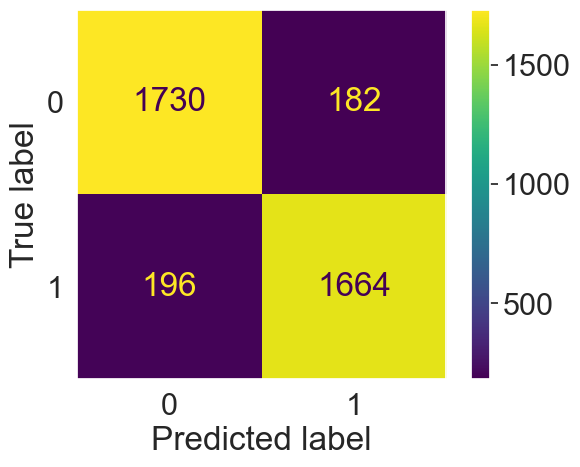



Boosting Tree:
Evaluation Metrics:
Accuracy: 0.8867974549310711
Recall: 0.8903225806451613
F1 Score: 0.8857983418026211
Precision: 0.8813198509845662
Confusion Matrix:


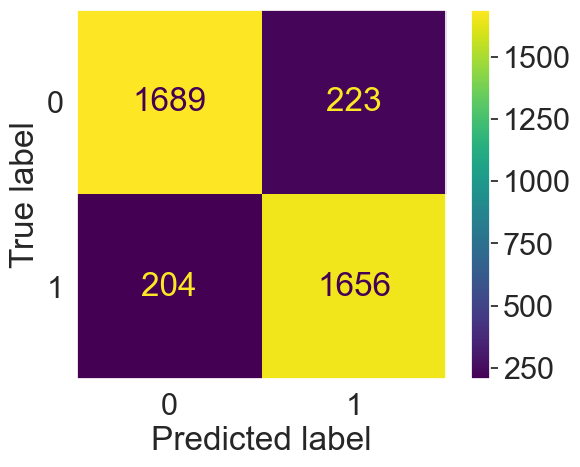



Voting Classification:
Evaluation Metrics:
Accuracy: 0.887592788971368
Recall: 0.9349462365591398
F1 Score: 0.8913377754997437
Precision: 0.8516160626836435
Confusion Matrix:


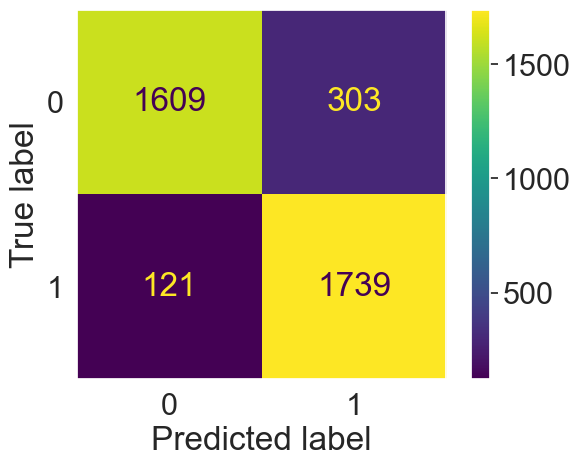



ROC Curve:


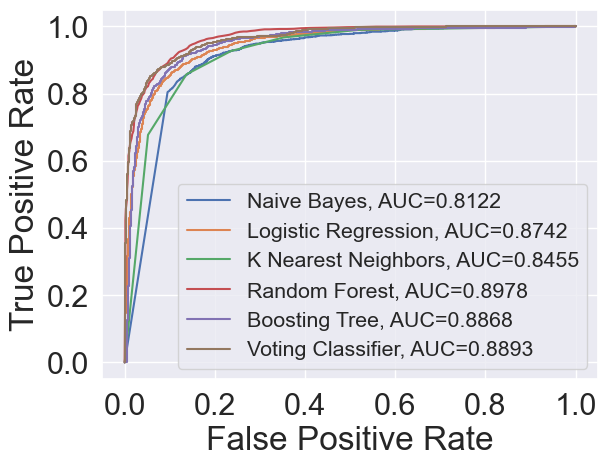

In [146]:
imp_knn = KNNImputer(n_neighbors = 5, weights = "uniform")

impute(imp_knn, data_absurd_z)

## Reursive Feature Elimination

In [ ]:
test_models_RFE(features, targets, 0.4, 25)

## Feature Importance

Random forest:
Evaluation Metrics:
Accuracy: 0.9349046015712682
Recall: 0.9472277889111557
F1 Score: 0.9421926910299003
Precision: 0.9372108393919365
Confusion Matrix:


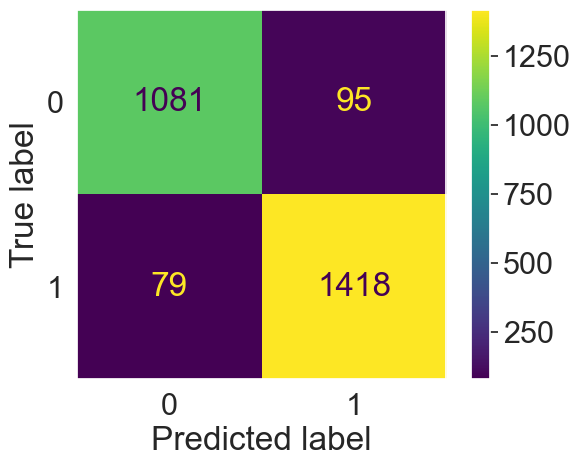



Boosting Tree:
Evaluation Metrics:
Accuracy: 0.9221848110737
Recall: 0.9385437541750167
F1 Score: 0.9310801855533466
Precision: 0.9237343852728468
Confusion Matrix:


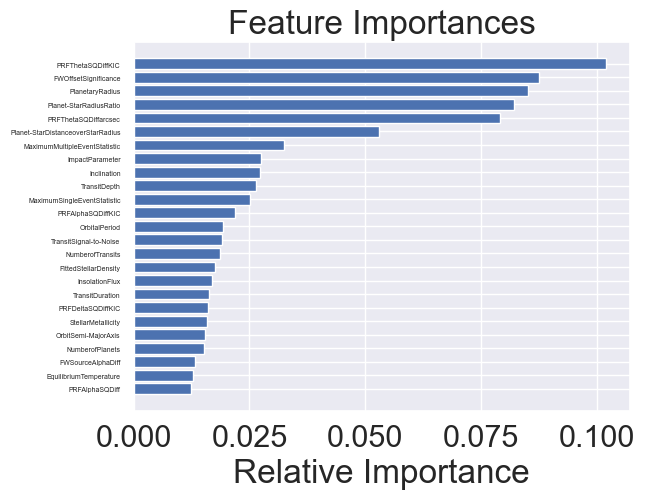

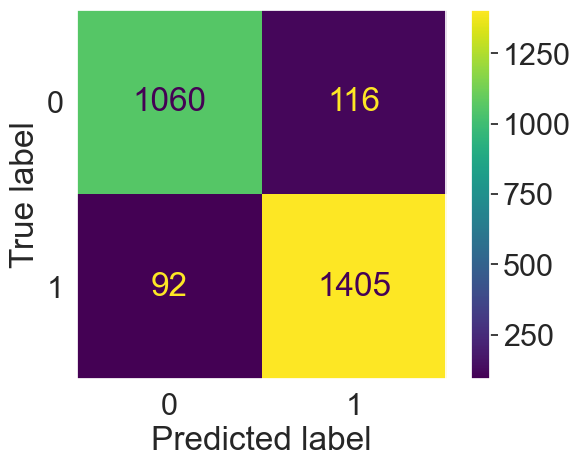

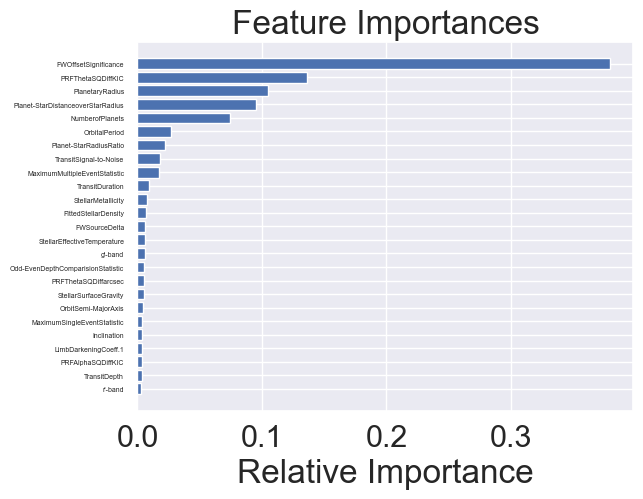

In [75]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(features, targets, random_state = 42, test_size = 0.4)
rand_forest_important(X_train_i, X_test_i, y_train_i, y_test_i, 5, 25)
boost_tree_important(X_train_i, X_test_i, y_train_i, y_test_i, 5, 25)

## RFECV

Proportion of testing size: 0.4
Optimal number of features: 39
Evaluation Metrics:
Accuracy: 0.9255518144407033
Recall: 0.9512358049432198
F1 Score: 0.9346898588775844
Precision: 0.9187096774193548
Confusion Matrix:


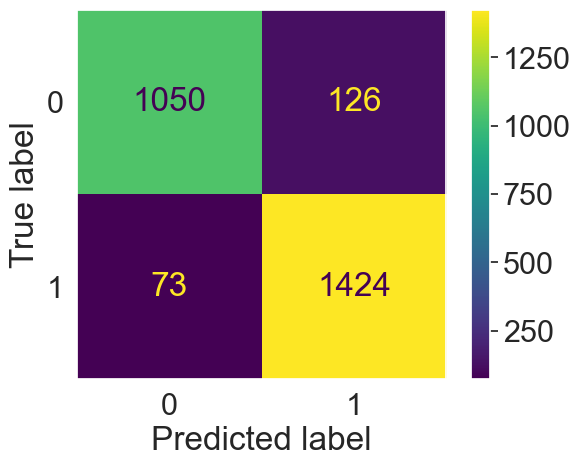

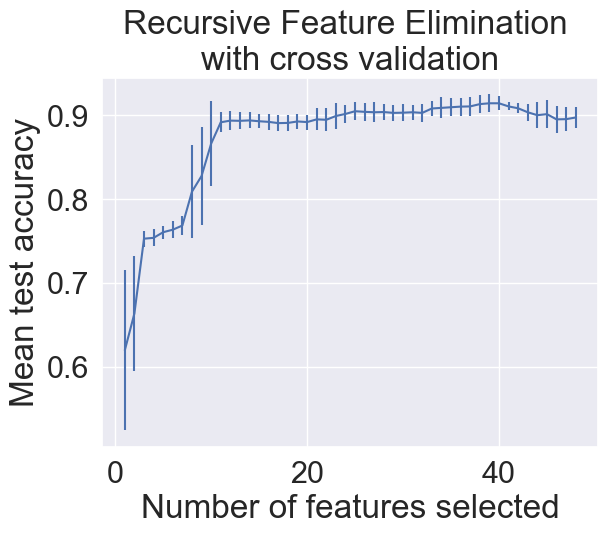

Optimal number of features: 28
Evaluation Metrics:
Accuracy: 0.934156378600823
Recall: 0.9472277889111557
F1 Score: 0.9415670650730412
Precision: 0.935973597359736
Confusion Matrix:


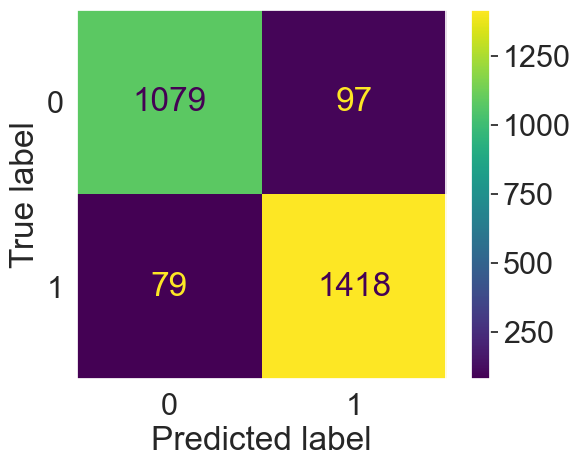

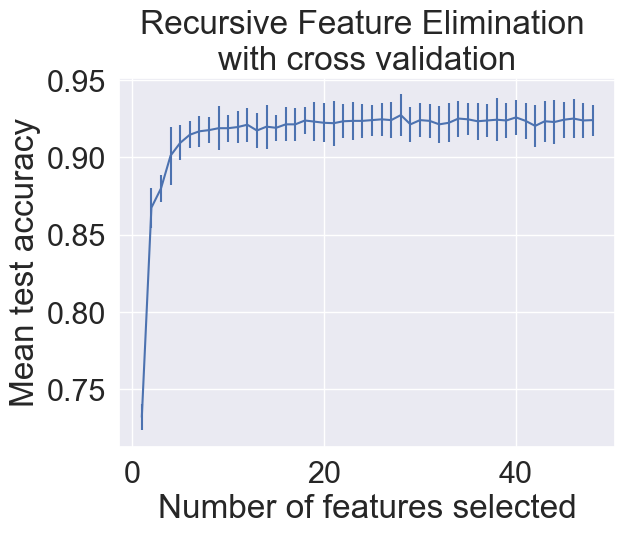

Optimal number of features: 26
Evaluation Metrics:
Accuracy: 0.9221848110737
Recall: 0.9392117568470274
F1 Score: 0.9311258278145695
Precision: 0.9231779382797111
Confusion Matrix:


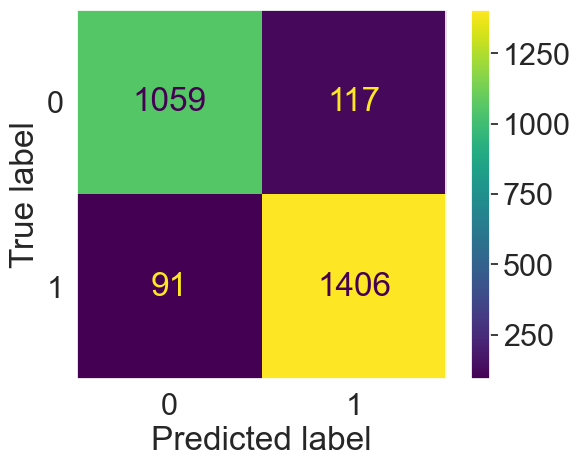

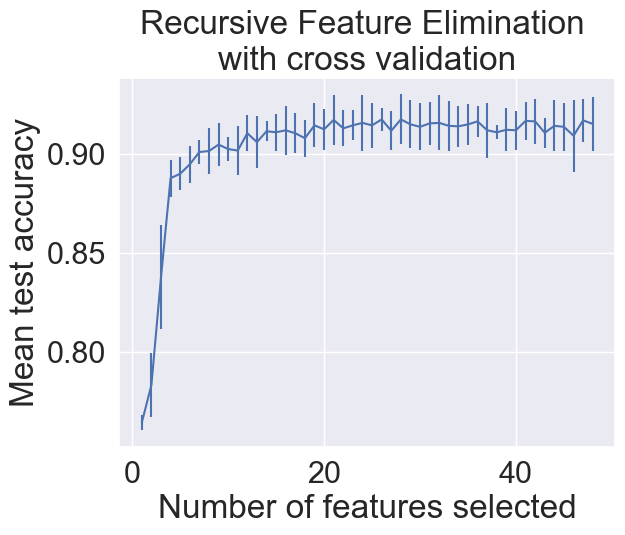

In [98]:
test_RFECV(features, targets, 0.4, 1)

Proportion of testing size: 0.4
Optimal number of features: 39
Optimal number of features: 44
Optimal number of features: 26


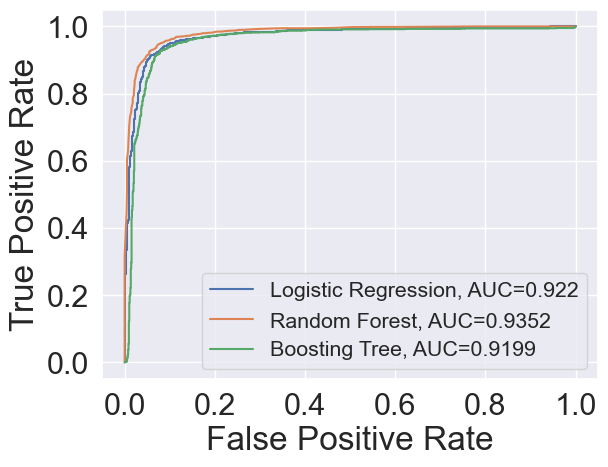

In [97]:
test_RFECV_ROC(features, targets, 0.4, 1)

## AIC BIC Stuff